# Import Library

In [1]:
import pandas as pd
import numpy as np

# Loading data

## Import Data

In [ ]:
# Set data path for Kaggle
if os.environ.get('KAGGLE_KERNEL_RUN_TYPE', 'Localhost') == 'Interactive':
    loan_data_inputs_train = pd.read_csv('/kaggle/input/creditrisk-train-test/loan_data_inputs_train.csv', index_col=0)
    loan_data_targets_train = pd.read_csv('/kaggle/input/creditrisk-train-test/loan_data_targets_train.csv', index_col=0)
    loan_data_inputs_test = pd.read_csv('/kaggle/input/creditrisk-train-test/loan_data_inputs_test.csv', index_col=0)
    loan_data_targets_test = pd.read_csv('/kaggle/input/creditrisk-train-test/loan_data_targets_test.csv', index_col=0)
    
else:
    loan_data_inputs_train = pd.read_csv('../data/loan_data_inputs_train.csv', index_col=0)
    loan_data_targets_train = pd.read_csv('../data/loan_data_targets_train.csv', index_col=0)
    loan_data_inputs_test = pd.read_csv('../data/loan_data_inputs_test.csv', index_col=0)
    loan_data_targets_test = pd.read_csv('../data/loan_data_targets_test.csv', index_col=0)

In [2]:
loan_data_backup = pd.read_csv("../data/loan_data_2015.csv")

/tmp/ipykernel_11815/3247381156.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv("../data/loan_data_2015.csv")


## Explore data

In [4]:
loan_data = loan_data_backup.copy()

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  float64
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

# Population Stability Index : Preprocessing

## General Preprocessing

### Preprocessing few continuous variables

In [6]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '5 years', '3 years', '4 years', nan,
       '2 years', '8 years', '9 years', '1 year', '6 years', '7 years'],
      dtype=object)

In [7]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

In [8]:
loan_data["emp_length_int"].head()

0    10
1     0
2     5
3    10
4    10
Name: emp_length_int, dtype: object

In [9]:
type(loan_data['emp_length_int'][0])

str

In [10]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

# loan_data["emp_length_int"] = dd.to_numeric(loan_data['emp_length_int'])

In [11]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [12]:
# loan_data['earliest_cr_line']

In [13]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [14]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
# (pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) #.compute()

In [16]:
def mnth_diff(x):
    end_date = pd.to_datetime('2017-12-01')
    year_diff = end_date.year - x.year 
    mnth_diff = end_date.month - x.month
    return year_diff*12 + mnth_diff + 1

In [17]:
# loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
loan_data['days_since_earliest_cr_line'] = pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']
loan_data['mths_since_earliest_cr_line'] = (pd.to_datetime('2017-12-01').to_period("M") - loan_data['earliest_cr_line_date'].dt.to_period("M")).apply(lambda x: x.n if pd.notnull(x) else x).fillna(np.nan).astype('Int64')
# loan_data["mths_since_earliest_cr_line_1"] = loan_data["earliest_cr_line_date"].apply(mnth_diff)
# loan_data['mths_since_earliest_cr_line'] = (pd.to_datetime('2017-12-01').to_period("M") - loan_data['earliest_cr_line_date'].dt.to_period("M")) #.apply(lambda x: x.n if pd.notnull(x) else x).fillna(np.nan).astype('Int64')
loan_data.loc[:, ["days_since_earliest_cr_line", "mths_since_earliest_cr_line"]].head() #, "mths_since_earliest_cr_line_1"]]

days_since_earliest_cr_line  mths_since_earliest_cr_line
0                  10165 days                          334
1                   5997 days                          197
2                   2345 days                           77
3                   6940 days                          228
4                   6331 days                          208

In [18]:
loan_data['mths_since_earliest_cr_line'].describe()

count      421094.0
mean     227.354876
std       98.123989
min          -612.0
25%           167.0
50%           212.0
75%           277.0
max           587.0
Name: mths_since_earliest_cr_line, dtype: Float64

In [19]:
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
254              Jan-57            2057-01-01                         -469
618              Aug-64            2064-08-01                         -560
648              Jul-68            2068-07-01                         -607
1808             Jan-65            2065-01-01                         -565
2583             Sep-64            2064-09-01                         -561
...                 ...                   ...                          ...
418890           Jun-68            2068-06-01                         -606
420450           Jan-66            2066-01-01                         -577
420642           Sep-68            2068-09-01                         -609
420794           Sep-65            2065-09-01                         -573
420887           Apr-63            2063-04-01                         -544

[1134 rows x 3 columns]

In [20]:
loan_data["mths_since_earliest_cr_line"].max()

587

In [21]:
loan_data.loc[(loan_data['mths_since_earliest_cr_line'] < 0), "mths_since_earliest_cr_line"] = loan_data['mths_since_earliest_cr_line'].max()

In [22]:
# loan_data['mths_since_earliest_cr_line'].min()

In [23]:
loan_data["term"].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [24]:
loan_data["term_int"] = loan_data["term"].str.strip().str.replace(" months", "").astype(int)

In [25]:
loan_data['term_int']

0         60
1         36
2         36
3         60
4         60
          ..
421089    36
421090    36
421091    60
421092    60
421093    36
Name: term_int, Length: 421094, dtype: int64

In [26]:
loan_data["issue_dt"] = pd.to_datetime(loan_data["issue_d"], format = "%b-%y")

In [27]:
loan_data["issue_dt"]

0        2015-12-01
1        2015-12-01
2        2015-12-01
3        2015-12-01
4        2015-12-01
            ...    
421089   2015-01-01
421090   2015-01-01
421091   2015-01-01
421092   2015-01-01
421093   2015-01-01
Name: issue_dt, Length: 421094, dtype: datetime64[ns]

In [28]:
loan_data["mths_since_issue_d"] = (pd.to_datetime('2017-12-01').to_period("M") - loan_data['issue_dt'].dt.to_period("M")).apply(lambda x: x.n if pd.notnull(x) else x).fillna(np.nan).astype('Int64')

In [29]:
loan_data.loc[:, ["mths_since_issue_d", "issue_d"]]

mths_since_issue_d issue_d
0                       24  Dec-15
1                       24  Dec-15
2                       24  Dec-15
3                       24  Dec-15
4                       24  Dec-15
...                    ...     ...
421089                  35  Jan-15
421090                  35  Jan-15
421091                  35  Jan-15
421092                  35  Jan-15
421093                  35  Jan-15

[421094 rows x 2 columns]

In [30]:
loan_data["emp_length"]

0         10+ years
1          < 1 year
2           5 years
3         10+ years
4         10+ years
            ...    
421089      8 years
421090    10+ years
421091      5 years
421092       1 year
421093    10+ years
Name: emp_length, Length: 421094, dtype: object

### Preprocessing few discrete variables

In [31]:
# loan_data.info()

In [32]:
pd.get_dummies(loan_data['grade'])

A      B      C      D      E      F      G
0       False  False   True  False  False  False  False
1        True  False  False  False  False  False  False
2       False  False   True  False  False  False  False
3       False  False   True  False  False  False  False
4       False   True  False  False  False  False  False
...       ...    ...    ...    ...    ...    ...    ...
421089  False   True  False  False  False  False  False
421090  False   True  False  False  False  False  False
421091  False  False  False   True  False  False  False
421092  False  False  False  False   True  False  False
421093  False   True  False  False  False  False  False

[421094 rows x 7 columns]

In [33]:
pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':')

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
0         False    False     True    False    False    False    False
1          True    False    False    False    False    False    False
2         False    False     True    False    False    False    False
3         False    False     True    False    False    False    False
4         False     True    False    False    False    False    False
...         ...      ...      ...      ...      ...      ...      ...
421089    False     True    False    False    False    False    False
421090    False     True    False    False    False    False    False
421091    False    False    False     True    False    False    False
421092    False    False    False    False     True    False    False
421093    False     True    False    False    False    False    False

[421094 rows x 7 columns]

In [34]:
# After Weigth of Evidence analysis, will back to do k-1 dummy with specific reference (drop out) category
# Add drop_first = True, to get dummy with k-1 columns
# loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':', drop_first=True),
#                      pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':', drop_first=True),
#                      pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':', drop_first=True),
#                      pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':', drop_first=True),
#                      pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':', drop_first=True),
#                      pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':', drop_first=True),
#                      pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':', drop_first=True),
#                      pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':', drop_first=True)]


loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [35]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [36]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [37]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [38]:
# loan_data.columns.values

## Check null

In [39]:
pd.options.display.max_rows = None

In [40]:
# loan_data.isnull().sum()

In [41]:
loan_data.fillna({'total_rev_hi_lim': loan_data['funded_amnt']}, inplace = True)

In [42]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [43]:
loan_data.fillna({"annual_inc" : loan_data["annual_inc"].mean()}, inplace=True)

In [44]:
# pd.options.display.max_rows = None
# loan_data.columns.values

In [45]:
loan_data.fillna({'mths_since_earliest_cr_line':0,
                  'acc_now_delinq':0,
                  'total_acc':0,
                  'pub_rec':0,
                  'open_acc':0,
                  'inq_last_6mths':0,
                  'delinq_2yrs':0,
                  'emp_length_int':0}, inplace=True)

# PD model

## Data preparation

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [46]:
loan_data['loan_status'].unique()

array(['Issued', 'Current', 'Fully Paid', 'In Grace Period',
       'Late (16-30 days)', 'Late (31-120 days)', 'Charged Off',
       'Default'], dtype=object)

In [47]:
loan_data['loan_status'].value_counts()

loan_status
Current               377553
Fully Paid             22984
Issued                  8460
Late (31-120 days)      4691
In Grace Period         3107
Charged Off             2773
Late (16-30 days)       1139
Default                  387
Name: count, dtype: int64

In [48]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

loan_status
Current               0.896600
Fully Paid            0.054582
Issued                0.020091
Late (31-120 days)    0.011140
In Grace Period       0.007378
Charged Off           0.006585
Late (16-30 days)     0.002705
Default               0.000919
Name: count, dtype: float64

In [49]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                               'Does not meet the credit policy. Status:Charged Off',
                                                               'Late (31-120 days)']), 0, 1)

### Splitting data

In [50]:
from sklearn.model_selection import train_test_split

### Data preprocessing - Train / Test dataset
for easy implementation of preprocessing with test data,  
after complete preprocessing on `train` data and strore in `loan_data_train`  
re-run with `test` data and store in `loan_data_test`  

In [51]:
#####
df_inputs_prepr = loan_data.drop("good_bad", axis="columns")
df_targets_prepr = loan_data["good_bad"]
#####
# df_inputs_prepr = loan_data_inputs_test
# df_targets_prepr = loan_data_targets_test

In [52]:
df_inputs_prepr["grade"].unique()

array(['C', 'A', 'B', 'F', 'D', 'E', 'G'], dtype=object)

In [53]:
df1 = pd.concat([df_inputs_prepr["grade"], df_targets_prepr], axis = "columns")
df1.head()

grade  good_bad
0     C         1
1     A         1
2     C         1
3     C         1
4     B         1

In [54]:
gr_cnt = df1.groupby(["grade", "good_bad"], as_index=False).agg(cnt = ("grade", "count"))

In [55]:
tt_cnt = df1.groupby(["good_bad"], as_index=False).agg(tt_cnt = ("grade", "count"))

In [56]:
tt_cnt

good_bad  tt_cnt
0         0    7851
1         1  413243

In [57]:
pv = (gr_cnt
 .merge(tt_cnt,on="good_bad",how="left")
 .assign(pct = lambda x : x["cnt"]/x["tt_cnt"])
 .replace({"good_bad": {0: "bad", 1:"good"}})
 .pivot(index="grade", columns="good_bad", values="pct")
 .assign(woe = lambda x : np.log(x["good"]/x["bad"]))
)

In [58]:
pv

good_bad       bad      good       woe
grade                                 
A         0.034008  0.176816  1.648502
B         0.133359  0.282059  0.749074
C         0.268119  0.286664  0.066882
D         0.259457  0.146686 -0.570298
E         0.191695  0.080928 -0.862345
F         0.086868  0.022106 -1.368556
G         0.026493  0.004741 -1.720744

In [59]:
inf_val = pv.assign(inf_val = lambda x : (x["good"] - x["bad"]) * x["woe"])["inf_val"].sum()

In [60]:
inf_val

0.633941376112442

In [61]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count()


grade  good_bad
0     A     73335
1     B    117606
2     C    120567
3     D     62654
4     E     34948
5     F      9817
6     G      2167

In [62]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()

grade  good_bad
0     A  0.996359
1     B  0.991097
2     C  0.982541
3     D  0.967488
4     E  0.956936
5     F  0.930529
6     G  0.904015

In [63]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis="columns")
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = "columns")
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [64]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)

In [65]:
df_temp

grade   n_obs  prop_good  prop_n_obs    n_good   n_bad  prop_n_good  \
0     G    2167   0.904015    0.005146    1959.0   208.0     0.004741   
1     F    9817   0.930529    0.023313    9135.0   682.0     0.022106   
2     E   34948   0.956936    0.082993   33443.0  1505.0     0.080928   
3     D   62654   0.967488    0.148789   60617.0  2037.0     0.146686   
4     C  120567   0.982541    0.286318  118462.0  2105.0     0.286664   
5     B  117606   0.991097    0.279287  116559.0  1047.0     0.282059   
6     A   73335   0.996359    0.174154   73068.0   267.0     0.176816   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.026493 -1.720744             NaN       NaN  0.633941  
1    0.086868 -1.368556        0.026514  0.352187  0.633941  
2    0.191695 -0.862345        0.026407  0.506211  0.633941  
3    0.259457 -0.570298        0.010552  0.292048  0.633941  
4    0.268119  0.066882        0.015053  0.637180  0.633941  
5    0.133359  0.749074        0.008557  0.682192  0.633941  
6    0.034008  1.648502        0.005262  0.899428  0.633941

### Visualize WoE

In [66]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [67]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str)) # convert to numpy array since better work with seaborn
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

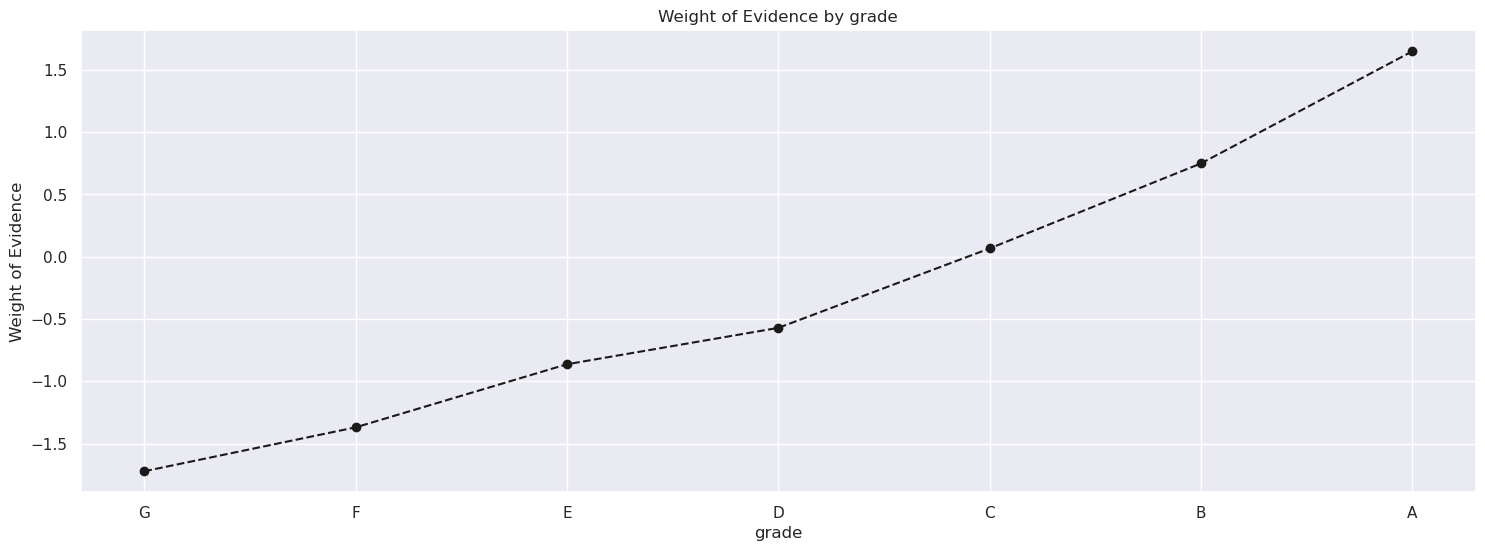

In [68]:
plot_by_woe(df_temp)

### Create dummy variable

In [69]:
df_inputs_prepr[df_inputs_prepr["home_ownership"]=="ANY"]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
26438   66544417   71270213      34300        34300          34300.0   
202957  55948695   59610441      24000        24000          24000.0   

              term  int_rate  installment grade sub_grade  ... addr_state:TX  \
26438    36 months     14.48      1180.31     C        C5  ...         False   
202957   60 months     16.55       590.68     D        D2  ...          True   

       addr_state:UT addr_state:VA  addr_state:VT addr_state:WA addr_state:WI  \
26438          False         False          False         False         False   
202957         False         False          False         False         False   

       addr_state:WV addr_state:WY initial_list_status:f initial_list_status:w  
26438          False         False                 False                  True  
202957         False         False                 False                  True  

[2 rows x 203 columns]

In [70]:
df_temp = woe_discrete(df_inputs_prepr, "home_ownership", df_targets_prepr)
df_temp

home_ownership   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0           RENT  167644   0.976933    0.398115  163777.0  3867.0   
1            OWN   45766   0.980750    0.108684   44885.0   881.0   
2       MORTGAGE  207682   0.985059    0.493196  204579.0  3103.0   
3            ANY       2   1.000000    0.000005       2.0     0.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.396321    0.492549 -0.217368             NaN       NaN  inf  
1     0.108616    0.112215 -0.032594        0.003817  0.184775  inf  
2     0.495057    0.395236  0.225190        0.004309  0.257784  inf  
3     0.000005    0.000000       inf        0.014941       inf  inf

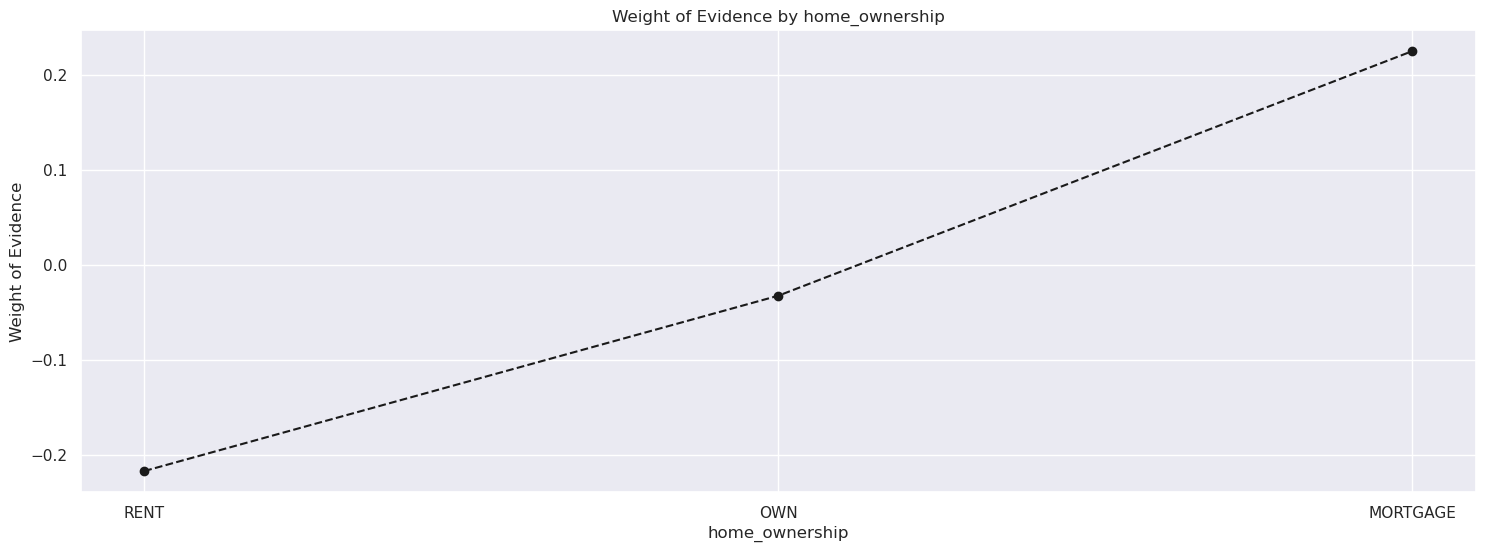

In [71]:
plot_by_woe(df_temp)

Combine "OTHER, "NONE", "RENT", "ANY" togather

In [74]:
df_inputs_prepr["home_ownership:RENT_OTHER_NONE_ANY"] = df_inputs_prepr["home_ownership:RENT"] + df_inputs_prepr["home_ownership:ANY"]

In [75]:
loan_data["home_ownership"].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY'], dtype=object)

In [76]:
df_inputs_prepr["addr_state"].unique()

array(['DC', 'IN', 'KS', 'IL', 'OR', 'VA', 'PA', 'GA', 'TN', 'OH', 'NY',
       'FL', 'NJ', 'RI', 'NC', 'AL', 'TX', 'SC', 'MD', 'WA', 'MO', 'MN',
       'NH', 'VT', 'AZ', 'MI', 'MA', 'CA', 'LA', 'DE', 'NM', 'CO', 'WI',
       'SD', 'CT', 'NE', 'HI', 'AR', 'MT', 'WV', 'WY', 'OK', 'NV', 'KY',
       'MS', 'ME', 'UT', 'ND', 'AK'], dtype=object)

In [77]:
df_temp = woe_discrete(df_inputs_prepr, "addr_state", df_targets_prepr)

In [80]:
df_temp

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          NV   5924   0.969953    0.014068   5746.0   178.0     0.013905   
1          SD    835   0.970060    0.001983    810.0    25.0     0.001960   
2          HI   2083   0.973596    0.004947   2028.0    55.0     0.004908   
3          OK   3968   0.976310    0.009423   3874.0    94.0     0.009375   
4          AK    954   0.977987    0.002266    933.0    21.0     0.002258   
5          NY  33844   0.978253    0.080372  33108.0   736.0     0.080118   
6          AL   5347   0.978306    0.012698   5231.0   116.0     0.012658   
7          UT   2836   0.978491    0.006735   2775.0    61.0     0.006715   
8          WY    900   0.978889    0.002137    881.0    19.0     0.002132   
9          FL  29298   0.979111    0.069576  28686.0   612.0     0.069417   
10         NM   2351   0.979158    0.005583   2302.0    49.0     0.005571   
11         VA  12033   0.979224    0.028576  11783.0   250.0     0.028513   
12         LA   5098   0.979600    0.012107   4994.0   104.0     0.012085   
13         MN   7799   0.979869    0.018521   7642.0   157.0     0.018493   
14         CA  58067   0.979885    0.137896  56899.0  1168.0     0.137689   
15         AZ   9700   0.980206    0.023035   9508.0   192.0     0.023008   
16         NC  12038   0.980312    0.028587  11801.0   237.0     0.028557   
17         IN   7264   0.980589    0.017250   7123.0   141.0     0.017237   
18         DE   1239   0.980630    0.002942   1215.0    24.0     0.002940   
19         MD  10057   0.980710    0.023883   9863.0   194.0     0.023867   
20         MS   2593   0.981489    0.006158   2545.0    48.0     0.006159   
21         WI   5663   0.981635    0.013448   5559.0   104.0     0.013452   
22         TX  34699   0.981786    0.082402  34067.0   632.0     0.082438   
23         OH  14394   0.982076    0.034182  14136.0   258.0     0.034207   
24         RI   1843   0.982094    0.004377   1810.0    33.0     0.004380   
25         NJ  15195   0.982231    0.036085  14925.0   270.0     0.036117   
26         MI  11436   0.982336    0.027158  11234.0   202.0     0.027185   
27         PA  14969   0.982965    0.035548  14714.0   255.0     0.035606   
28         WA   8917   0.983178    0.021176   8767.0   150.0     0.021215   
29         TN   6903   0.983196    0.016393   6787.0   116.0     0.016424   
30         KY   4112   0.983463    0.009765   4044.0    68.0     0.009786   
31         MO   6699   0.983729    0.015909   6590.0   109.0     0.015947   
32         AR   3152   0.983820    0.007485   3101.0    51.0     0.007504   
33         KS   3736   0.983940    0.008872   3676.0    60.0     0.008895   
34         MA   9521   0.984140    0.022610   9370.0   151.0     0.022674   
35         GA  14110   0.984196    0.033508  13887.0   223.0     0.033605   
36         OR   4944   0.984628    0.011741   4868.0    76.0     0.011780   
37         SC   5056   0.984771    0.012007   4979.0    77.0     0.012049   
38         CO   9068   0.985223    0.021534   8934.0   134.0     0.021619   
39         MT   1162   0.985370    0.002759   1145.0    17.0     0.002771   
40         CT   6327   0.985459    0.015025   6235.0    92.0     0.015088   
41         WV   1974   0.985816    0.004688   1946.0    28.0     0.004709   
42         IL  16864   0.986539    0.040048  16637.0   227.0     0.040260   
43         DC   1006   0.989066    0.002389    995.0    11.0     0.002408   
44         VT    892   0.992152    0.002118    885.0     7.0     0.002142   
45         NH   2062   0.994180    0.004897   2050.0    12.0     0.004961   
46         NE   1162   0.994836    0.002759   1156.0     6.0     0.002797   
47         ND    479   0.997912    0.001138    478.0     1.0     0.001157   
48         ME    521   1.000000    0.001237    521.0     0.0     0.001261   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.022672 -0.488919             NaN       NaN  inf  
1     0.003184 -0.485236        0.00

In [78]:
df_temp.head()

addr_state  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0         NV   5924   0.969953    0.014068  5746.0  178.0     0.013905   
1         SD    835   0.970060    0.001983   810.0   25.0     0.001960   
2         HI   2083   0.973596    0.004947  2028.0   55.0     0.004908   
3         OK   3968   0.976310    0.009423  3874.0   94.0     0.009375   
4         AK    954   0.977987    0.002266   933.0   21.0     0.002258   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.022672 -0.488919             NaN       NaN  inf  
1    0.003184 -0.485236        0.000107  0.003683  inf  
2    0.007005 -0.355923        0.003536  0.129314  inf  
3    0.011973 -0.244647        0.002715  0.111276  inf  
4    0.002675 -0.169512        0.001677  0.075135  inf

In [79]:
plot_by_woe(df_temp)

Error in callback <function flush_figures at 0x7f4affe78400> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [81]:
# Add North Dakota state (ND) to support future data with this state

if ['addr_statad:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr["addr_state:ND"] = 0

In [82]:
# for Indiana (ID)
if ['addr_statad:ID'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr["addr_state:ID"] = 0

In [83]:
# for Idaho (IA)
if ['addr_statad:IA'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr["addr_state:IA"] = 0

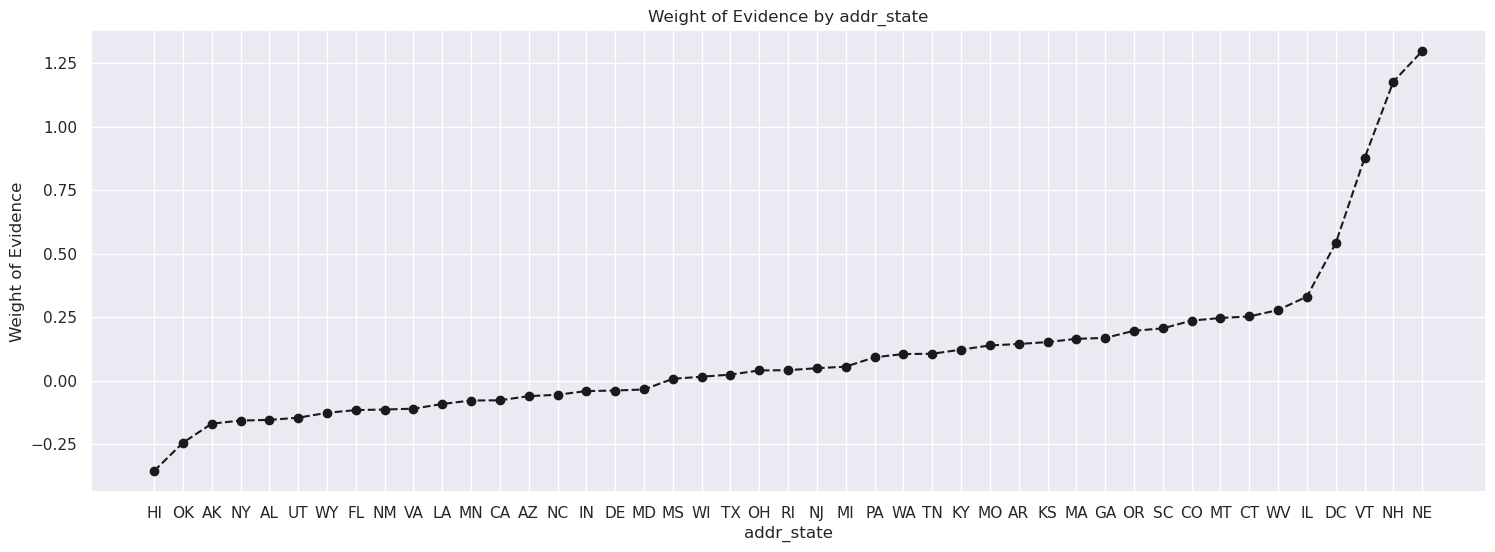

In [84]:
plot_by_woe(df_temp.iloc[2:-2, :])

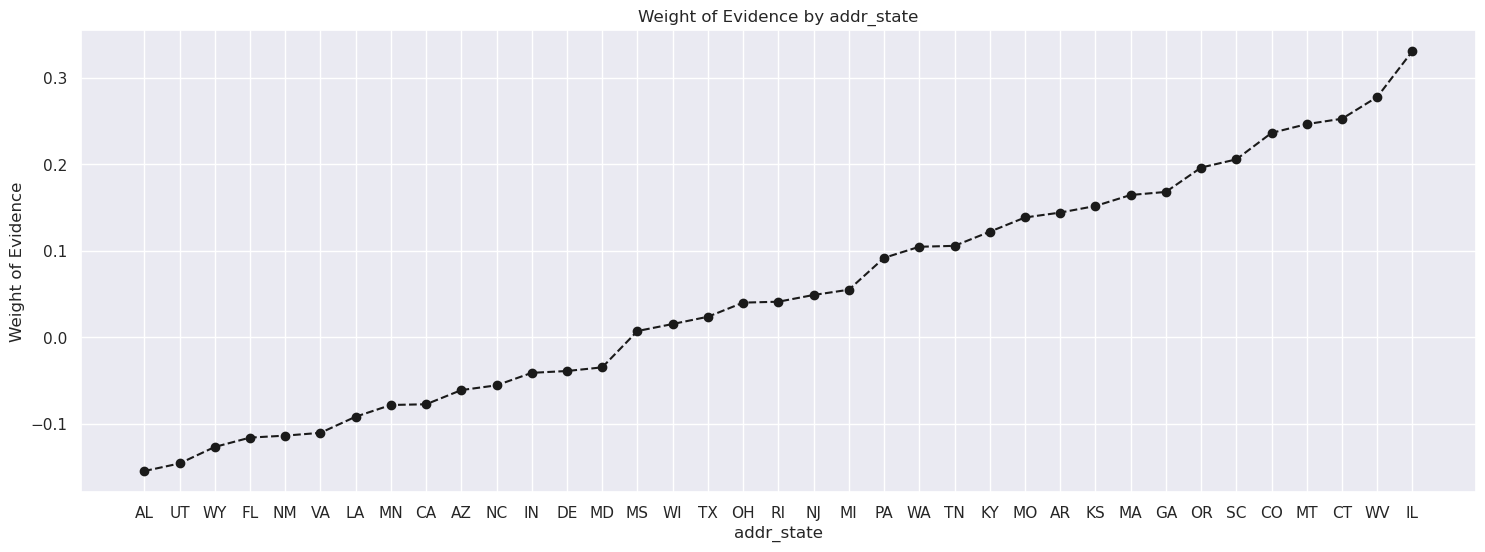

In [85]:
plot_by_woe(df_temp.iloc[6: -6, :])

In [86]:
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                                         df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                                         df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                         df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

#### Homework : Categorize `verification_status`, `purpose`, `initial_list_status`

In [87]:
df_temp = woe_discrete(df_inputs_prepr, "verification_status", df_targets_prepr)

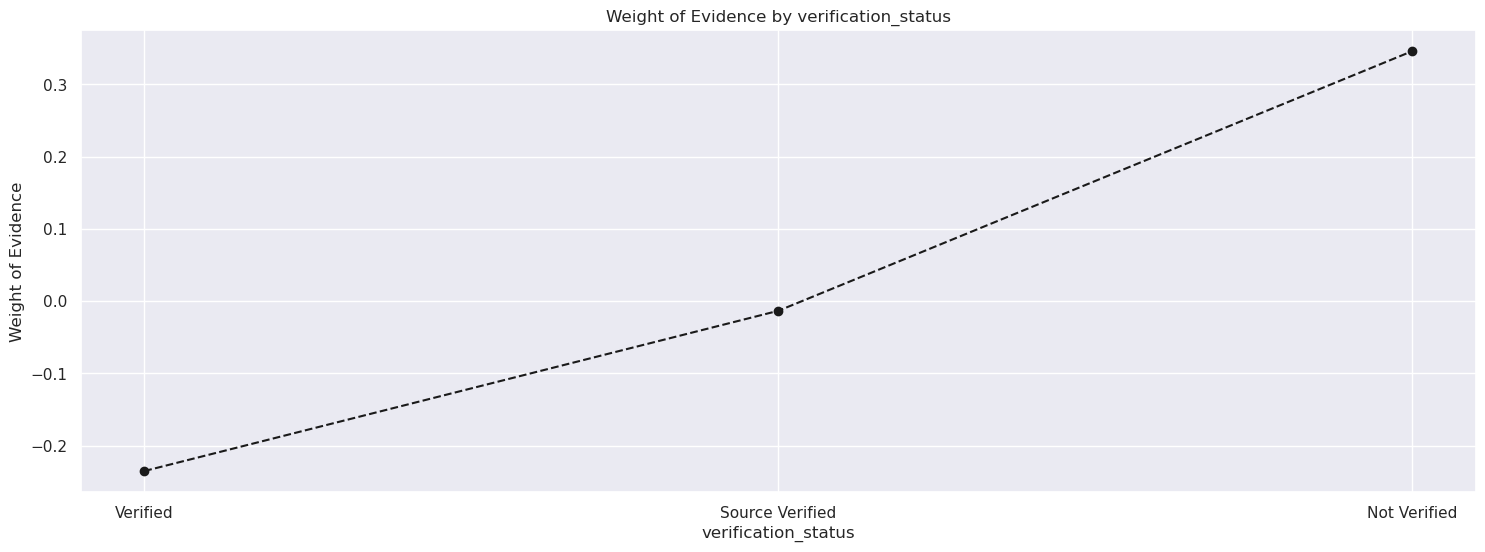

In [88]:
plot_by_woe(df_temp)

In [89]:
df_temp = woe_discrete(df_inputs_prepr, "purpose", df_targets_prepr)

In [90]:
df_temp

purpose   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0              wedding       4   0.750000    0.000009       3.0     1.0   
1     renewable_energy     224   0.955357    0.000532     214.0    10.0   
2       small_business    3364   0.958680    0.007989    3225.0   139.0   
3               moving    2420   0.965289    0.005747    2336.0    84.0   
4                house    1438   0.967316    0.003415    1391.0    47.0   
5              medical    3938   0.970797    0.009352    3823.0   115.0   
6       major_purchase    7449   0.975970    0.017690    7270.0   179.0   
7                other   19204   0.976672    0.045605   18756.0   448.0   
8             vacation    2249   0.977768    0.005341    2199.0    50.0   
9   debt_consolidation  250020   0.979878    0.593739  244989.0  5031.0   
10    home_improvement   25292   0.982445    0.060063   24848.0   444.0   
11                 car    3466   0.982689    0.008231    3406.0    60.0   
12         credit_card  102025   0.987817    0.242286  100782.0  1243.0   
13         educational       1   1.000000    0.000002       1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.000007    0.000127 -2.864783             NaN       NaN  inf  
1      0.000518    0.001274 -0.900004        0.205357  1.964779  inf  
2      0.007804    0.017705 -0.819181        0.003323  0.080823  inf  
3      0.005653    0.010699 -0.638016        0.006609  0.181164  inf  
4      0.003366    0.005986 -0.575764        0.002026  0.062252  inf  
5      0.009251    0.014648 -0.459536        0.003482  0.116228  inf  
6      0.017593    0.022800 -0.259269        0.005173  0.200267  inf  
7      0.045387    0.057063 -0.228919        0.000702  0.030350  inf  
8      0.005321    0.006369 -0.179660        0.001096  0.049259  inf  
9      0.592845    0.640810 -0.077800        0.002110  0.101860  inf  
10     0.060129    0.056553  0.061313        0.002567  0.139113  inf  
11     0.008242    0.007642  0.075554        0.000244  0.014241  inf  
12     0.243881    0.158324  0.432037        0.005128  0.356483  inf  
13     0.000002    0.000000       inf        0.012183       inf  inf

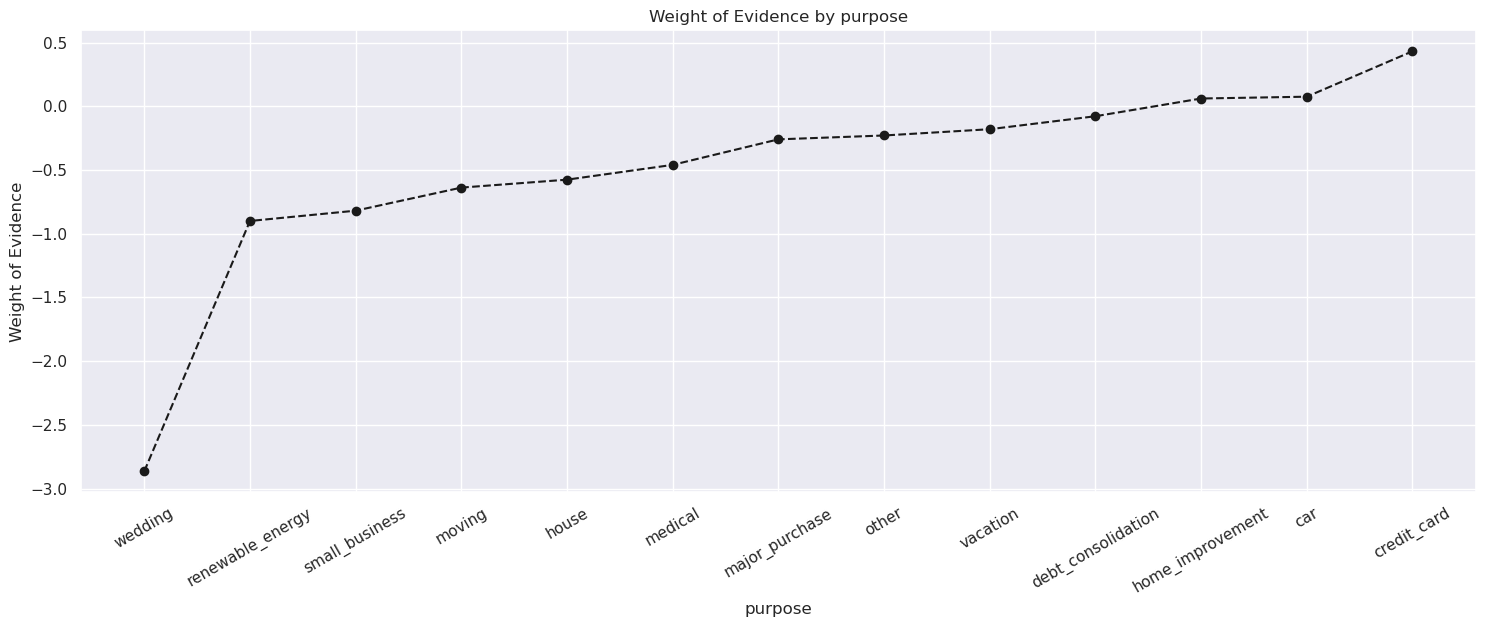

In [91]:
plot_by_woe(df_temp, rotation_of_x_axis_labels=30)

In [92]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

### Categorizing continuous variable

In [93]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis="columns")
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = "columns")
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    # df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [94]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "term_int", df_targets_prepr)

In [95]:
df_temp

term_int   n_obs  prop_good  prop_n_obs    n_good   n_bad  prop_n_good  \
0        36  283172   0.983533    0.672467  278509.0  4663.0     0.673959   
1        60  137922   0.976885    0.327533  134734.0  3188.0     0.326041   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.593937  0.126396             NaN       NaN  0.027678  
1    0.406063 -0.219486        0.006647  0.345883  0.027678

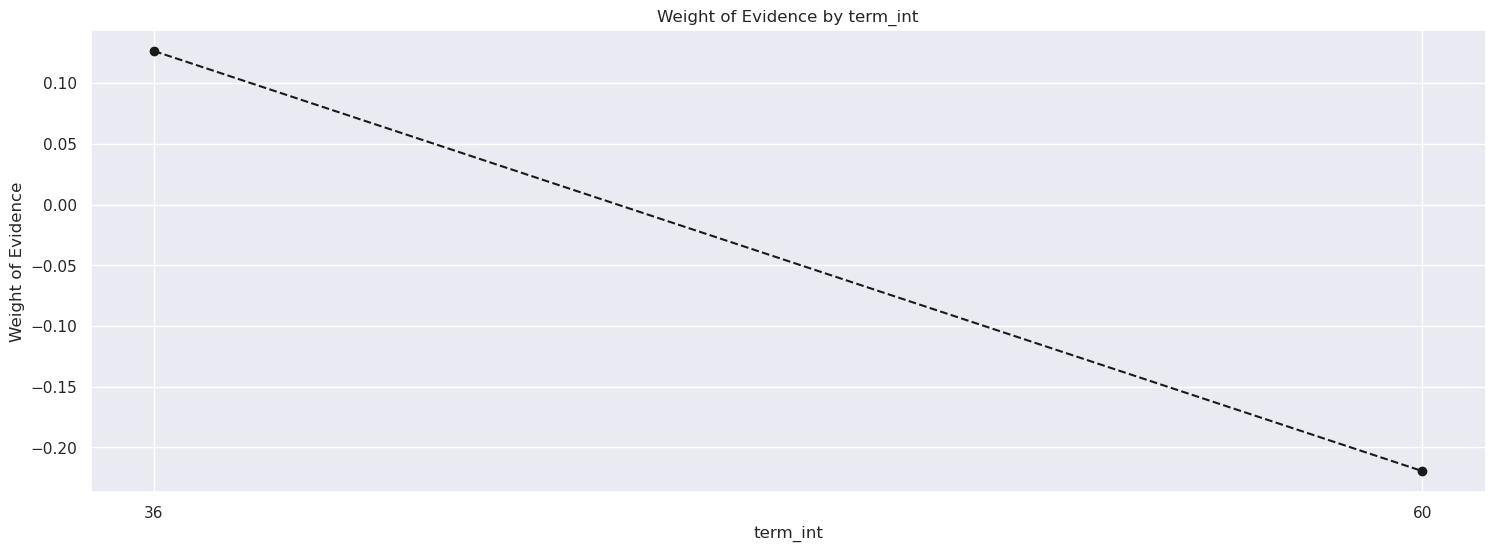

In [96]:
plot_by_woe(df_temp)

In [97]:
df_inputs_prepr["term:36"] = np.where(df_inputs_prepr["term_int"] == 36, 1, 0)
df_inputs_prepr["term:60"] = np.where(df_inputs_prepr["term_int"] == 60, 1, 0)

In [98]:
df_inputs_prepr["emp_length_int"].unique()

array([10.,  0.,  5.,  3.,  4.,  2.,  8.,  9.,  1.,  6.,  7.])

In [99]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "emp_length_int", df_targets_prepr)

In [100]:
df_temp

emp_length_int   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0              0.0   58157   0.977733    0.138109   56862.0  1295.0   
1              1.0   27473   0.977687    0.065242   26860.0   613.0   
2              2.0   37497   0.980932    0.089047   36782.0   715.0   
3              3.0   33430   0.980975    0.079388   32794.0   636.0   
4              4.0   24506   0.979678    0.058196   24008.0   498.0   
5              5.0   24930   0.980866    0.059203   24453.0   477.0   
6              6.0   16838   0.978976    0.039986   16484.0   354.0   
7              7.0   18414   0.979201    0.043729   18031.0   383.0   
8              8.0   21560   0.983905    0.051200   21213.0   347.0   
9              9.0   16769   0.982289    0.039822   16472.0   297.0   
10            10.0  141520   0.984200    0.336077  139284.0  2236.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.137599    0.164947 -0.181278             NaN       NaN  0.019134  
1      0.064998    0.078079 -0.183366        0.000046  0.002088  0.019134  
2      0.089008    0.091071 -0.022914        0.003245  0.160453  0.019134  
3      0.079358    0.081009 -0.020593        0.000043  0.002321  0.019134  
4      0.058097    0.063431 -0.087853        0.001297  0.067260  0.019134  
5      0.059173    0.060757 -0.026403        0.001188  0.061449  0.019134  
6      0.039889    0.045090 -0.122546        0.001890  0.096143  0.019134  
7      0.043633    0.048784 -0.111582        0.000224  0.010964  0.019134  
8      0.051333    0.044198  0.149650        0.004705  0.261232  0.019134  
9      0.039860    0.037830  0.052290        0.001617  0.097360  0.019134  
10     0.337051    0.284804  0.168432        0.001911  0.116141  0.019134

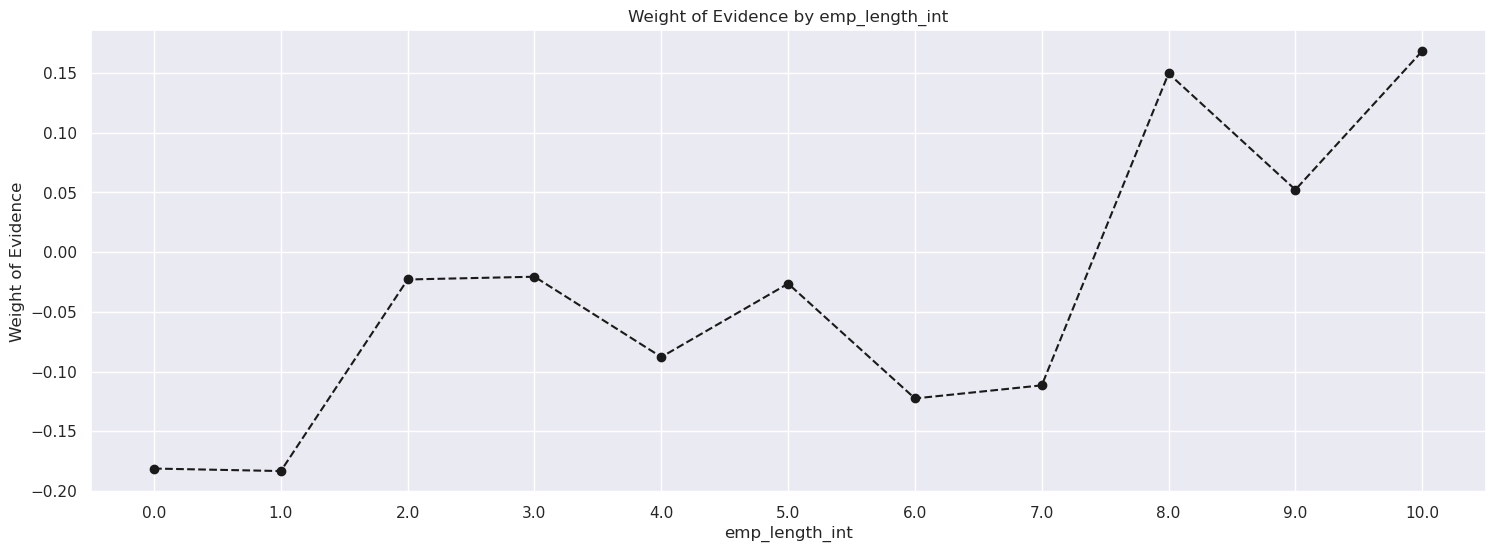

In [101]:
plot_by_woe(df_temp)

In [102]:
list(range(2,5))

[2, 3, 4]

In [103]:
df_inputs_prepr["emp_length:0"] = np.where(df_inputs_prepr["emp_length_int"].isin([0]), 1, 0)
df_inputs_prepr["emp_length:1"] = np.where(df_inputs_prepr["emp_length_int"].isin([1]), 1, 0)
df_inputs_prepr["emp_length:2-4"] = np.where(df_inputs_prepr["emp_length_int"].isin(list(range(2, 5))), 1, 0)
df_inputs_prepr["emp_length:5-6"] = np.where(df_inputs_prepr["emp_length_int"].isin(list(range(5, 7))), 1, 0)
df_inputs_prepr["emp_length:7-9"] = np.where(df_inputs_prepr["emp_length_int"].isin(list(range(7, 10))), 1, 0)
df_inputs_prepr["emp_length:10"] = np.where(df_inputs_prepr["emp_length_int"].isin([10]), 1, 0)

In [104]:
df_inputs_prepr["mths_since_issue_d"].unique()

<IntegerArray>
[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
Length: 12, dtype: Int64

In [105]:
df_inputs_prepr["mths_since_issue_d_factor"] = pd.cut(df_inputs_prepr["mths_since_issue_d"], 50)

In [106]:
df_inputs_prepr["mths_since_issue_d_factor"].head()

0    (23.989, 24.22]
1    (23.989, 24.22]
2    (23.989, 24.22]
3    (23.989, 24.22]
4    (23.989, 24.22]
Name: mths_since_issue_d_factor, dtype: category
Categories (50, interval[float64, right]): [(23.989, 24.22] < (24.22, 24.44] < (24.44, 24.66] < (24.66, 24.88] ... (34.12, 34.34] < (34.34, 34.56] < (34.56, 34.78] < (34.78, 35.0]]

In [107]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "mths_since_issue_d_factor", df_targets_prepr)

/tmp/ipykernel_11815/2353512927.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_11815/2353512927.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = "columns")


In [108]:
df_temp.head()

mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs   n_good  n_bad  \
0           (23.989, 24.22]  44342   1.000000    0.105302  44342.0    0.0   
1            (24.22, 24.44]      0        NaN    0.000000      NaN    NaN   
2            (24.44, 24.66]      0        NaN    0.000000      NaN    NaN   
3            (24.66, 24.88]      0        NaN    0.000000      NaN    NaN   
4             (24.88, 25.1]  37530   0.998082    0.089125  37458.0   72.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.107302    0.000000       inf             NaN       NaN  inf  
1          NaN         NaN       NaN             NaN       NaN  inf  
2          NaN         NaN       NaN             NaN       NaN  inf  
3          NaN         NaN       NaN             NaN       NaN  inf  
4     0.090644    0.009171  2.290915             NaN       NaN  inf

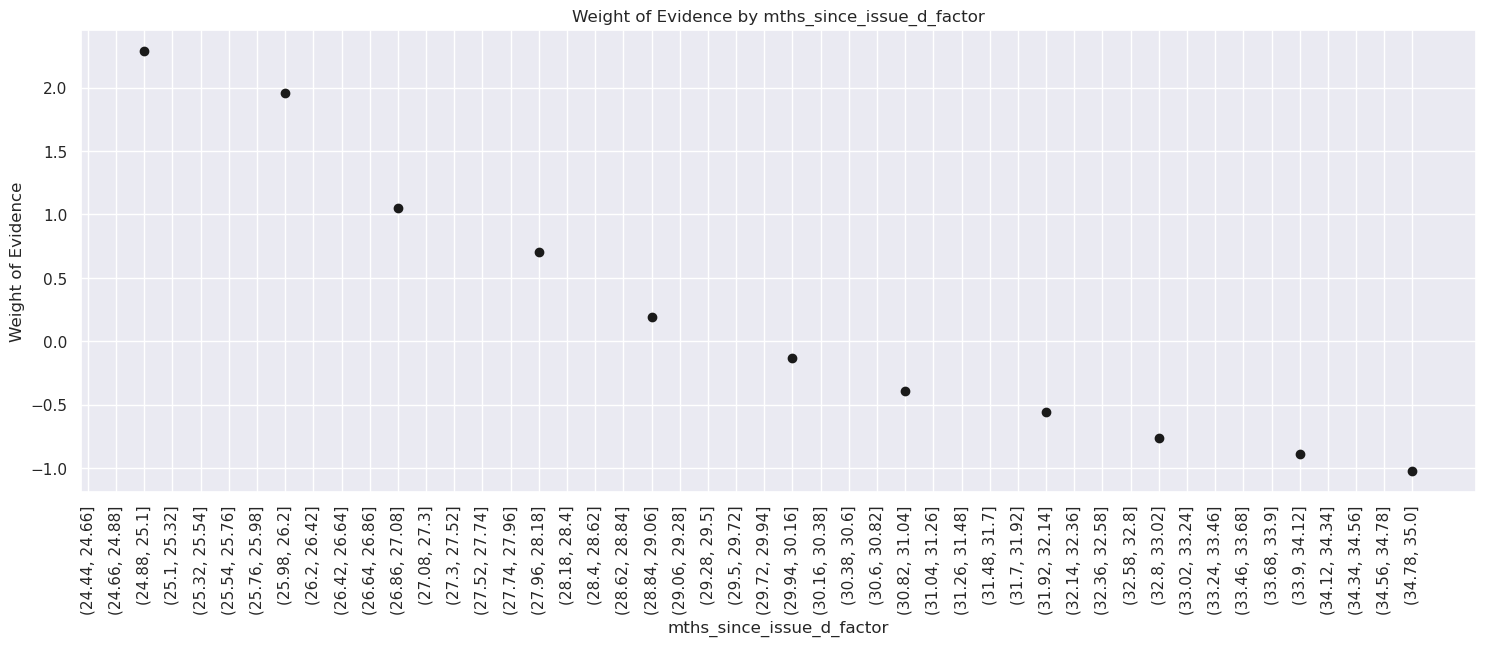

In [109]:
plot_by_woe(df_temp, rotation_of_x_axis_labels=90)

In [110]:
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [111]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [112]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

/tmp/ipykernel_11815/2353512927.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_11815/2353512927.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = "columns")


int_rate_factor  n_obs  prop_good  prop_n_obs   n_good  n_bad  \
0     (5.296, 5.793]   9651   0.999689    0.022919   9648.0    3.0   
1     (5.793, 6.267]  10214   0.997259    0.024256  10186.0   28.0   
2      (6.267, 6.74]   6530   0.994793    0.015507   6496.0   34.0   
3      (6.74, 7.214]  12488   0.995275    0.029656  12429.0   59.0   
4     (7.214, 7.687]  11416   0.997985    0.027110  11393.0   23.0   
5      (7.687, 8.16]  20636   0.995687    0.049006  20547.0   89.0   
6      (8.16, 8.634]  22498   0.994133    0.053428  22366.0  132.0   
7     (8.634, 9.107]   2020   0.979703    0.004797   1979.0   41.0   
8     (9.107, 9.581]  22171   0.992783    0.052651  22011.0  160.0   
9    (9.581, 10.054]  22364   0.993829    0.053109  22226.0  138.0   
10  (10.054, 10.527]   2271   0.975341    0.005393   2215.0   56.0   
11  (10.527, 11.001]  22559   0.991400    0.053572  22365.0  194.0   
12  (11.001, 11.474]   4780   0.985565    0.011351   4711.0   69.0   
13  (11.474, 11.948]  18875   0.990305    0.044824  18692.0  183.0   
14  (11.948, 12.421]  28919   0.983436    0.068676  28440.0  479.0   
15  (12.421, 12.894]  22799   0.986271    0.054142  22486.0  313.0   
16  (12.894, 13.368]  24609   0.983014    0.058441  24191.0  418.0   
17  (13.368, 13.841]   7433   0.985067    0.017652   7322.0  111.0   
18  (13.841, 14.315]  20243   0.977671    0.048072  19791.0  452.0   
19  (14.315, 14.788]  16697   0.980476    0.039651  16371.0  326.0   
20  (14.788, 15.261]   2344   0.952218    0.005566   2232.0  112.0   
21  (15.261, 15.735]  16718   0.974160    0.039701  16286.0  432.0   
22  (15.735, 16.208]   1852   0.938985    0.004398   1739.0  113.0   
23  (16.208, 16.682]  12548   0.967565    0.029799  12141.0  407.0   
24  (16.682, 17.155]  11482   0.965424    0.027267  11085.0  397.0   
25  (17.155, 17.628]  10062   0.968297    0.023895   9743.0  319.0   
26  (17.628, 18.102]   9854   0.962655    0.023401   9486.0  368.0   
27  (18.102, 18.575]  14616   0.969007    0.034710  14163.0  453.0   
28  (18.575, 19.049]   3139   0.956356    0.007454   3002.0  137.0   
29  (19.049, 19.522]   6273   0.947075    0.014897   5941.0  332.0   
30  (19.522, 19.995]   4564   0.959027    0.010838   4377.0  187.0   
31  (19.995, 20.469]      0        NaN    0.000000      NaN    NaN   
32  (20.469, 20.942]   1449   0.930297    0.003441   1348.0  101.0   
33  (20.942, 21.416]   3417   0.964881    0.008115   3297.0  120.0   
34  (21.416, 21.889]   1137   0.898857    0.002700   1022.0  115.0   
35  (21.889, 22.362]   2659   0.950357    0.006315   2527.0  132.0   
36  (22.362, 22.836]     49   1.000000    0.000116     49.0    0.0   
37  (22.836, 23.309]   2677   0.930146    0.006357   2490.0  187.0   
38  (23.309, 23.783]      0        NaN    0.000000      NaN    NaN   
39  (23.783, 24.256]   1910   0.930890    0.004536   1778.0  132.0   
40  (24.256, 24.729]    582   0.850515    0.001382    495.0   87.0   
41  (24.729, 25.203]   1342   0.918033    0.003187   1232.0  110.0   
42  (25.203, 25.676]    415   0.843373    0.000986    350.0   65.0   
43   (25.676, 26.15]   1547   0.895281    0.003674   1385.0  162.0   
44   (26.15, 26.623]      0        NaN    0.000000      NaN    NaN   
45  (26.623, 27.096]    453   0.951435    0.001076    431.0   22.0   
46   (27.096, 27.57]    354   0.932203    0.000841    330.0   24.0   
47   (27.57, 28.043]    227   0.955947    0.000539    217.0   10.0   
48  (28.043, 28.517]    139   0.956835    0.000330    133.0    6.0   
49   (28.517, 28.99]    112   0.883929    0.000266     99.0   13.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.023347    0.000382  4.112499             NaN       NaN  inf  
1      0.024649    0.003566  1.933170        0.002430  2.179329  inf  
2      0.015720    0.004331  1.289186        0.002465  0.643984  inf  
3      0.030077    0.007515  1.386855        0.000482  0.097669  inf  
4      0.027570    0.002930  2.241865        0.002710  0.855010  inf  
5      0

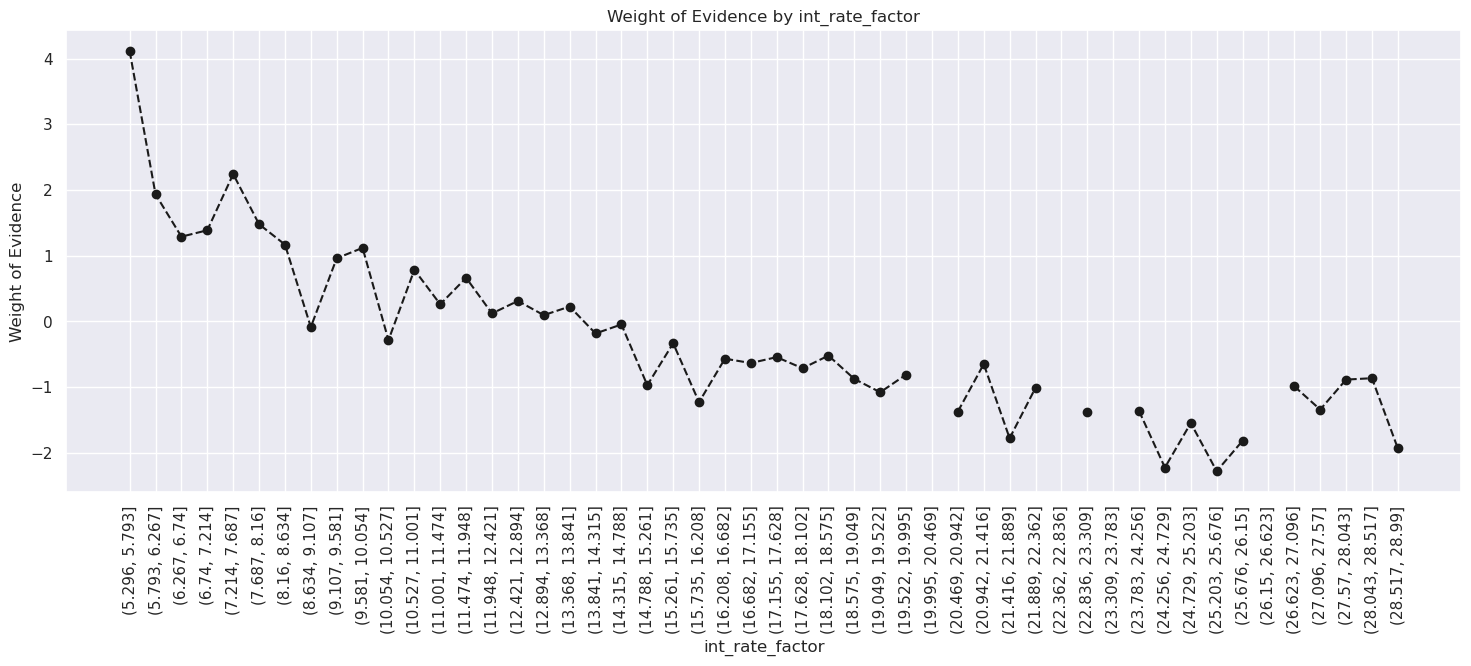

In [113]:
plot_by_woe(df_temp, 90)

In [114]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [115]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

/tmp/ipykernel_11815/2353512927.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_11815/2353512927.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = "columns")


funded_amnt_factor  n_obs  prop_good  prop_n_obs   n_good  n_bad  \
0      (966.0, 1680.0]   3391   0.982306    0.008053   3331.0   60.0   
1     (1680.0, 2360.0]   3751   0.981338    0.008908   3681.0   70.0   
2     (2360.0, 3040.0]   8134   0.981190    0.019316   7981.0  153.0   
3     (3040.0, 3720.0]   5133   0.983246    0.012190   5047.0   86.0   
4     (3720.0, 4400.0]   7315   0.980041    0.017371   7169.0  146.0   
5     (4400.0, 5080.0]  18150   0.982479    0.043102  17832.0  318.0   
6     (5080.0, 5760.0]   5617   0.984867    0.013339   5532.0   85.0   
7     (5760.0, 6440.0]  16224   0.982618    0.038528  15942.0  282.0   
8     (6440.0, 7120.0]  10565   0.982489    0.025089  10380.0  185.0   
9     (7120.0, 7800.0]   8423   0.980173    0.020003   8256.0  167.0   
10    (7800.0, 8480.0]  17295   0.981151    0.041072  16969.0  326.0   
11    (8480.0, 9160.0]   9255   0.981740    0.021978   9086.0  169.0   
12    (9160.0, 9840.0]   6898   0.981879    0.016381   6773.0  125.0   
13   (9840.0, 10520.0]  33582   0.983265    0.079749  33020.0  562.0   
14  (10520.0, 11200.0]   9958   0.977104    0.023648   9730.0  228.0   
15  (11200.0, 11880.0]   3813   0.967480    0.009055   3689.0  124.0   
16  (11880.0, 12560.0]  28601   0.981539    0.067921  28073.0  528.0   
17  (12560.0, 13240.0]   7923   0.979553    0.018815   7761.0  162.0   
18  (13240.0, 13920.0]   3723   0.971797    0.008841   3618.0  105.0   
19  (13920.0, 14600.0]  12209   0.979851    0.028994  11963.0  246.0   
20  (14600.0, 15280.0]  26506   0.983438    0.062946  26067.0  439.0   
21  (15280.0, 15960.0]   3535   0.972277    0.008395   3437.0   98.0   
22  (15960.0, 16640.0]  14142   0.982888    0.033584  13900.0  242.0   
23  (16640.0, 17320.0]   6096   0.979823    0.014477   5973.0  123.0   
24  (17320.0, 18000.0]  13664   0.982436    0.032449  13424.0  240.0   
25  (18000.0, 18680.0]   2739   0.974443    0.006504   2669.0   70.0   
26  (18680.0, 19360.0]   4923   0.977250    0.011691   4811.0  112.0   
27  (19360.0, 20040.0]  26477   0.983231    0.062877  26033.0  444.0   
28  (20040.0, 20720.0]   2233   0.978504    0.005303   2185.0   48.0   
29  (20720.0, 21400.0]   7925   0.979685    0.018820   7764.0  161.0   
30  (21400.0, 22080.0]   4795   0.980188    0.011387   4700.0   95.0   
31  (22080.0, 22760.0]   2136   0.973783    0.005073   2080.0   56.0   
32  (22760.0, 23440.0]   3008   0.984375    0.007143   2961.0   47.0   
33  (23440.0, 24120.0]  13806   0.980298    0.032786  13534.0  272.0   
34  (24120.0, 24800.0]   1803   0.970050    0.004282   1749.0   54.0   
35  (24800.0, 25480.0]  13964   0.986322    0.033161  13773.0  191.0   
36  (25480.0, 26160.0]   2063   0.984973    0.004899   2032.0   31.0   
37  (26160.0, 26840.0]   1336   0.973802    0.003173   1301.0   35.0   
38  (26840.0, 27520.0]   2199   0.982719    0.005222   2161.0   38.0   
39  (27520.0, 28200.0]   9083   0.987119    0.021570   8966.0  117.0   
40  (28200.0, 28880.0]   1106   0.973779    0.002626   1077.0   29.0   
41  (28880.0, 29560.0]   1217   0.975349    0.002890   1187.0   30.0   
42  (29560.0, 30240.0]  10292   0.983288    0.024441  10120.0  172.0   
43  (30240.0, 30920.0]    580   0.968966    0.001377    562.0   18.0   
44  (30920.0, 31600.0]    915   0.981421    0.002173    898.0   17.0   
45  (31600.0, 32280.0]   1987   0.977353    0.004719   1942.0   45.0   
46  (32280.0, 32960.0]    632   0.974684    0.001501    616.0   16.0   
47  (32960.0, 33640.0]   1106   0.978300    0.002626   1082.0   24.0   
48  (33640.0, 34320.0]    665   0.984962    0.001579    655.0   10.0   
49  (34320.0, 35000.0]  20201   0.977724    0.047973  19751.0  450.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.008061    0.007642  0.053288             NaN       NaN  0.027107  
1      0.008908    0.008916 -0.000950        0.000968  0.054239  0.027107  
2      0.019313    0.019488 -0.009014        0.000148  0.008063  0.027107  
3      0.012213    0.010954

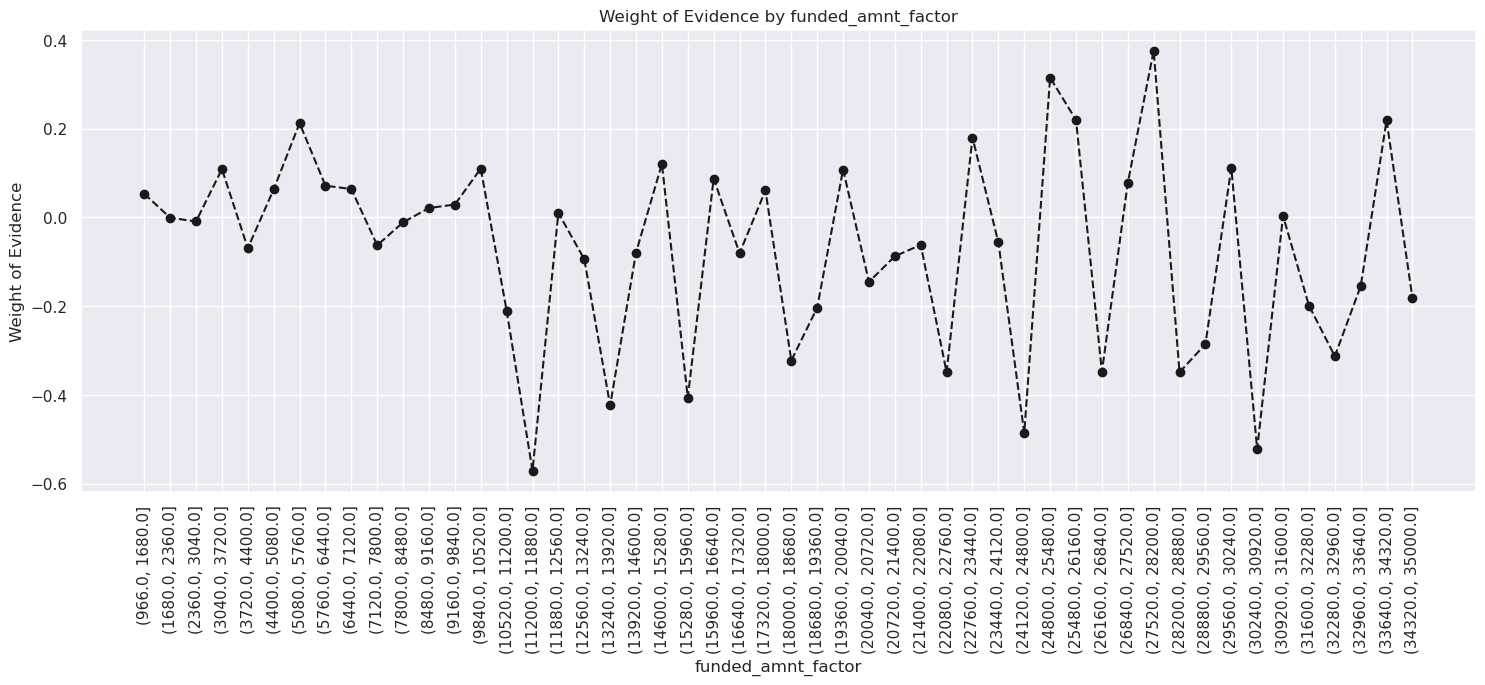

In [116]:
plot_by_woe(df_temp, 90)

WoE show no tread and jumpy across all the variable -> this features could not give strong evidence , esp. from IV = 0.014 = no evidence

#### Homework

In [117]:
df_inputs_prepr["mths_since_earliest_cr_line_factor"] = pd.cut(df_inputs_prepr["mths_since_earliest_cr_line"], 40)
df_temp = woe_ordered_continuous(df_inputs_prepr, "mths_since_earliest_cr_line_factor", df_targets_prepr)
df_temp
# mths_since_earliest_cr_line low iv (0.016) could ignore

/tmp/ipykernel_11815/2353512927.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_11815/2353512927.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = "columns")


mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                     (60.474, 74.15]   3212   0.977895    0.007628   3141.0   
1                       (74.15, 87.3]   6075   0.975309    0.014427   5925.0   
2                      (87.3, 100.45]   6414   0.973807    0.015232   6246.0   
3                     (100.45, 113.6]   7388   0.969816    0.017545   7165.0   
4                     (113.6, 126.75]  12407   0.977593    0.029464  12129.0   
5                     (126.75, 139.9]  16575   0.976109    0.039362  16179.0   
6                     (139.9, 153.05]  22991   0.978296    0.054598  22492.0   
7                     (153.05, 166.2]  27877   0.977185    0.066201  27241.0   
8                     (166.2, 179.35]  29551   0.980102    0.070177  28963.0   
9                     (179.35, 192.5]  30731   0.979565    0.072979  30103.0   
10                    (192.5, 205.65]  31270   0.981292    0.074259  30685.0   
11                    (205.65, 218.8]  29392   0.982342    0.069799  28873.0   
12                    (218.8, 231.95]  25329   0.982550    0.060150  24887.0   
13                    (231.95, 245.1]  22298   0.982330    0.052953  21904.0   
14                    (245.1, 258.25]  18365   0.982358    0.043613  18041.0   
15                    (258.25, 271.4]  18573   0.984817    0.044107  18291.0   
16                    (271.4, 284.55]  16193   0.983635    0.038455  15928.0   
17                    (284.55, 297.7]  14177   0.986104    0.033667  13980.0   
18                    (297.7, 310.85]   9571   0.984850    0.022729   9426.0   
19                    (310.85, 324.0]   9374   0.984425    0.022261   9228.0   
20                    (324.0, 337.15]   9389   0.986580    0.022297   9263.0   
21                    (337.15, 350.3]   8548   0.984909    0.020300   8419.0   
22                    (350.3, 363.45]   7137   0.985148    0.016949   7031.0   
23                    (363.45, 376.6]   6237   0.985410    0.014811   6146.0   
24                    (376.6, 389.75]   5209   0.985602    0.012370   5134.0   
25                    (389.75, 402.9]   4767   0.984267    0.011321   4692.0   
26                    (402.9, 416.05]   4384   0.986086    0.010411   4323.0   
27                    (416.05, 429.2]   3071   0.989254    0.007293   3038.0   
28                    (429.2, 442.35]   2219   0.987382    0.005270   2191.0   
29                    (442.35, 455.5]   1731   0.989024    0.004111   1712.0   
30                    (455.5, 468.65]   1755   0.984046    0.004168   1727.0   
31                    (468.65, 481.8]   1764   0.985261    0.004189   1738.0   
32                    (481.8, 494.95]   1434   0.986750    0.003405   1415.0   
33                    (494.95, 508.1]   1161   0.986219    0.002757   1145.0   
34                    (508.1, 521.25]    808   0.982673    0.001919    794.0   
35                    (521.25, 534.4]    715   0.983217    0.001698    703.0   
36                    (534.4, 547.55]    644   0.990683    0.001529    638.0   
37                    (547.55, 560.7]    473   0.978858    0.001123    463.0   
38                    (560.7, 573.85]    377   0.981432    0.000895    370.0   
39                    (573.85, 587.0]   1508   0.977454    0.003581   1474.0   

    n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0    71.0     0.007601    0.009043 -0.173778             NaN       NaN   
1   150.0     0.014338    0.019106 -0.287094        0.002587  0.113316   
2   168.0     0.015115    0.021399 -0.347662        0.001501  0.060568   
3   223.0     0.017338    0.028404 -0.493603        0.003991  0.145941   
4   278.0     0.029351    0.035410 -0.187661        0.007777  0.305942   
5   396.0     0.039151    0.050439 -0.253340        0.001485  0.065678   
6   499.0     0.054428    0.063559 -0.155086        0.002187  0.098254   
7   636.0     0.065920    0.081009 -0.206115        0.001110  0.051029   
8   588.0     0.070087    0.074895 -0.066347        0.00

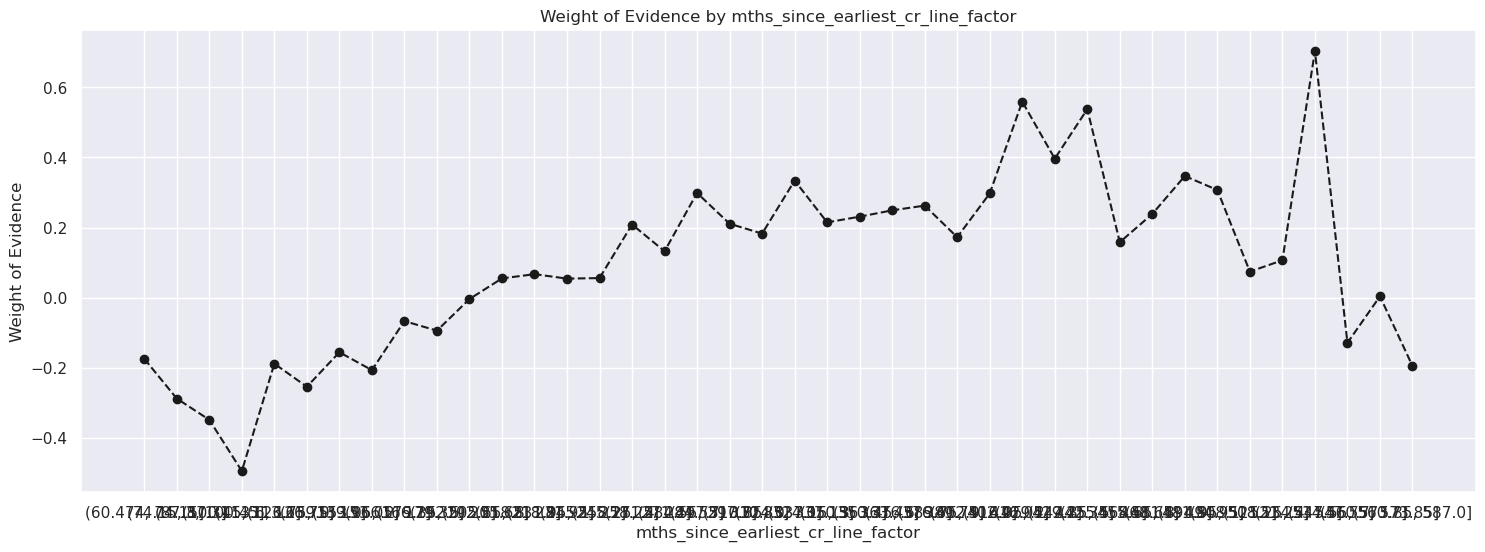

In [118]:
plot_by_woe(df_temp)

In [119]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [120]:
df_inputs_prepr["delinq_2yrs"].unique()

array([ 0.,  2.,  1.,  3.,  4.,  6.,  5., 15.,  7.,  9., 10.,  8., 11.,
       13., 14., 12., 30., 18., 16., 17., 26., 20., 19., 22., 27., 39.])

In [121]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "delinq_2yrs", df_targets_prepr)
df_temp

delinq_2yrs   n_obs  prop_good  prop_n_obs    n_good   n_bad  prop_n_good  \
0           0.0  334007   0.981812    0.793189  327932.0  6075.0     0.793557   
1           1.0   57000   0.980246    0.135362   55874.0  1126.0     0.135209   
2           2.0   17241   0.979120    0.040943   16881.0   360.0     0.040850   
3           3.0    6293   0.976800    0.014944    6147.0   146.0     0.014875   
4           4.0    2949   0.976263    0.007003    2879.0    70.0     0.006967   
5           5.0    1475   0.978305    0.003503    1443.0    32.0     0.003492   
6           6.0     842   0.980998    0.002000     826.0    16.0     0.001999   
7           7.0     438   0.984018    0.001040     431.0     7.0     0.001043   
8           8.0     284   0.982394    0.000674     279.0     5.0     0.000675   
9           9.0     173   0.976879    0.000411     169.0     4.0     0.000409   
10         10.0     127   0.968504    0.000302     123.0     4.0     0.000298   
11         11.0      80   0.962500    0.000190      77.0     3.0     0.000186   
12         12.0      51   0.960784    0.000121      49.0     2.0     0.000119   
13         13.0      39   1.000000    0.000093      39.0     0.0     0.000094   
14         14.0      37   1.000000    0.000088      37.0     0.0     0.000090   
15         15.0      21   1.000000    0.000050      21.0     0.0     0.000051   
16         16.0      12   1.000000    0.000028      12.0     0.0     0.000029   
17         17.0       7   1.000000    0.000017       7.0     0.0     0.000017   
18         18.0       5   1.000000    0.000012       5.0     0.0     0.000012   
19         19.0       5   1.000000    0.000012       5.0     0.0     0.000012   
20         20.0       2   0.500000    0.000005       1.0     1.0     0.000002   
21         22.0       1   1.000000    0.000002       1.0     0.0     0.000002   
22         26.0       2   1.000000    0.000005       2.0     0.0     0.000005   
23         27.0       1   1.000000    0.000002       1.0     0.0     0.000002   
24         30.0       1   1.000000    0.000002       1.0     0.0     0.000002   
25         39.0       1   1.000000    0.000002       1.0     0.0     0.000002   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.773787  0.025229             NaN       NaN  inf  
1     0.143421 -0.058967        0.001566  0.084197  inf  
2     0.045854 -0.115555        0.001126  0.056588  inf  
3     0.018596 -0.223282        0.002320  0.107727  inf  
4     0.008916 -0.246692        0.000536  0.023410  inf  
5     0.004076 -0.154651        0.002042  0.092041  inf  
6     0.002038 -0.019389        0.002693  0.135262  inf  
7     0.000892  0.156803        0.003021  0.176192  inf  
8     0.000637  0.058379        0.001624  0.098424  inf  
9     0.000509 -0.219791        0.005516  0.278170  inf  
10    0.000509 -0.537505        0.008375  0.317714  inf  
11    0.000382 -0.718202        0.006004  0.180697  inf  
12    0.000255 -0.764722        0.001716  0.046520  inf  
13    0.000000       inf        0.039216       inf  inf  
14    0.000000       inf        0.000000       NaN  inf  
15    0.000000       inf        0.000000       NaN  inf  
16    0.000000       inf        0.000000       NaN  inf  
17    0.000000       inf        0.000000       NaN  inf  
18    0.000000       inf        0.000000       NaN  inf  
19    0.000000       inf        0.000000       NaN  inf  
20    0.000127 -3.963395        0.500000       inf  inf  
21    0.000000       inf        0.500000       inf  inf  
22    0.000000       inf        0.000000       NaN  inf  
23    0.000000       inf        0.000000       NaN  inf  
24    0.000000       inf        0.000000       NaN  inf  
25    0.000000       inf        0.000000       NaN  inf

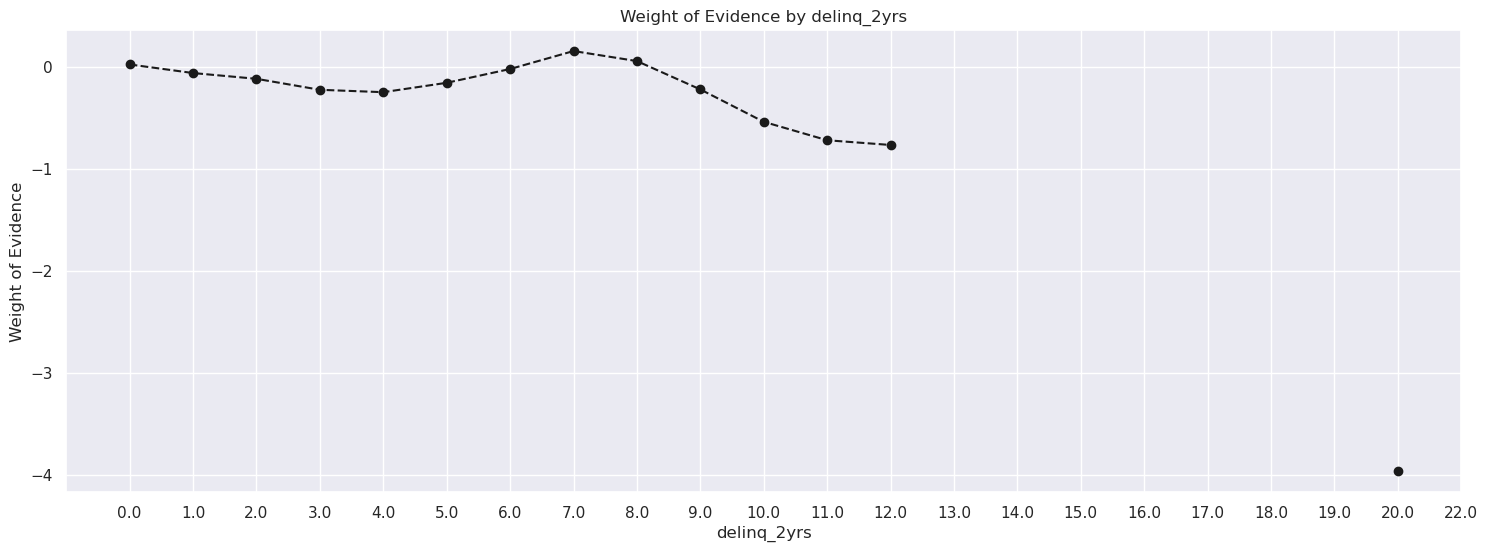

In [122]:
plot_by_woe(df_temp)

In [123]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [124]:
df_inputs_prepr["inq_last_6mths"].unique()

array([0., 1., 3., 4., 2., 5., 6.])

In [125]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "inq_last_6mths", df_targets_prepr)
df_temp

inq_last_6mths   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0             0.0  256407   0.984813    0.608907  252513.0  3894.0   
1             1.0  111346   0.978571    0.264421  108960.0  2386.0   
2             2.0   36292   0.973438    0.086185   35328.0   964.0   
3             3.0   12272   0.964635    0.029143   11838.0   434.0   
4             4.0    3517   0.966164    0.008352    3398.0   119.0   
5             5.0    1217   0.957272    0.002890    1165.0    52.0   
6             6.0      43   0.953488    0.000102      41.0     2.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0     0.611052    0.495988  0.208631             NaN       NaN  0.06837  
1     0.263671    0.303910 -0.142032        0.006242  0.350663  0.06837  
2     0.085490    0.122787 -0.362055        0.005134  0.220023  0.06837  
3     0.028647    0.055280 -0.657369        0.008803  0.295314  0.06837  
4     0.008223    0.015157 -0.611576        0.001529  0.045793  0.06837  
5     0.002819    0.006623 -0.854162        0.008892  0.242586  0.06837  
6     0.000099    0.000255 -0.942970        0.003784  0.088808  0.06837

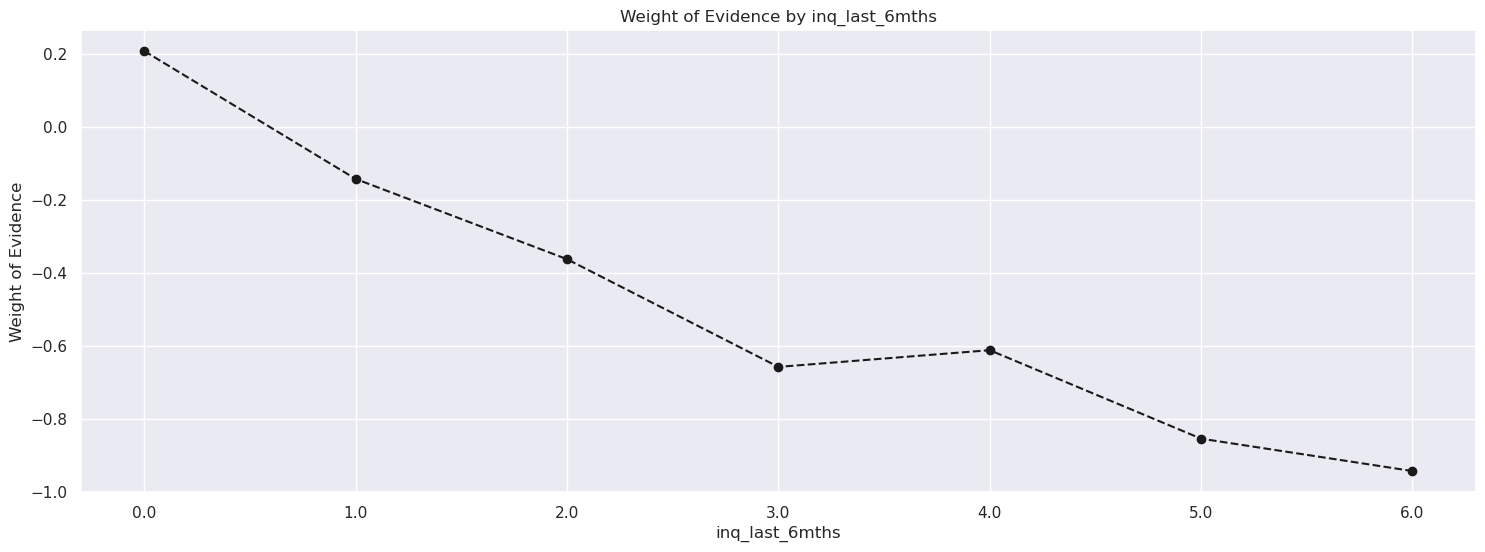

In [126]:
plot_by_woe(df_temp)

In [127]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [128]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "open_acc", df_targets_prepr)
df_temp

open_acc  n_obs  prop_good  prop_n_obs   n_good  n_bad  prop_n_good  \
0        1.0     90   0.988889    0.000214     89.0    1.0     0.000215   
1        2.0    986   0.972617    0.002342    959.0   27.0     0.002321   
2        3.0   4119   0.984462    0.009782   4055.0   64.0     0.009813   
3        4.0  10779   0.978941    0.025598  10552.0  227.0     0.025535   
4        5.0  18222   0.980738    0.043273  17871.0  351.0     0.043246   
5        6.0  25117   0.980491    0.059647  24627.0  490.0     0.059594   
6        7.0  30294   0.981283    0.071941  29727.0  567.0     0.071936   
7        8.0  34685   0.980885    0.082369  34022.0  663.0     0.082329   
8        9.0  36266   0.981801    0.086123  35606.0  660.0     0.086162   
9       10.0  35809   0.980647    0.085038  35116.0  693.0     0.084977   
10      11.0  33153   0.980364    0.078731  32502.0  651.0     0.078651   
11      12.0  30105   0.979173    0.071492  29478.0  627.0     0.071333   
12      13.0  26836   0.982300    0.063729  26361.0  475.0     0.063791   
13      14.0  23084   0.982109    0.054819  22671.0  413.0     0.054861   
14      15.0  19544   0.981273    0.046412  19178.0  366.0     0.046409   
15      16.0  16501   0.982547    0.039186  16213.0  288.0     0.039234   
16      17.0  13870   0.982408    0.032938  13626.0  244.0     0.032973   
17      18.0  11462   0.982900    0.027220  11266.0  196.0     0.027262   
18      19.0   9627   0.983484    0.022862   9468.0  159.0     0.022911   
19      20.0   7807   0.982195    0.018540   7668.0  139.0     0.018556   
20      21.0   6321   0.982914    0.015011   6213.0  108.0     0.015035   
21      22.0   5209   0.982722    0.012370   5119.0   90.0     0.012387   
22      23.0   4170   0.982734    0.009903   4098.0   72.0     0.009917   
23      24.0   3423   0.978966    0.008129   3351.0   72.0     0.008109   
24      25.0   2767   0.987712    0.006571   2733.0   34.0     0.006614   
25      26.0   2088   0.982280    0.004959   2051.0   37.0     0.004963   
26      27.0   1758   0.982366    0.004175   1727.0   31.0     0.004179   
27      28.0   1356   0.988201    0.003220   1340.0   16.0     0.003243   
28      29.0   1126   0.989343    0.002674   1114.0   12.0     0.002696   
29      30.0    845   0.984615    0.002007    832.0   13.0     0.002013   
30      31.0    689   0.985486    0.001636    679.0   10.0     0.001643   
31      32.0    638   0.979624    0.001515    625.0   13.0     0.001512   
32      33.0    482   0.979253    0.001145    472.0   10.0     0.001142   
33      34.0    362   0.991713    0.000860    359.0    3.0     0.000869   
34      35.0    284   0.989437    0.000674    281.0    3.0     0.000680   
35      36.0    219   0.981735    0.000520    215.0    4.0     0.000520   
36      37.0    187   0.973262    0.000444    182.0    5.0     0.000440   
37      38.0    141   0.978723    0.000335    138.0    3.0     0.000334   
38      39.0    124   0.983871    0.000294    122.0    2.0     0.000295   
39      40.0     99   0.969697    0.000235     96.0    3.0     0.000232   
40      41.0     78   0.987179    0.000185     77.0    1.0     0.000186   
41      42.0     81   0.975309    0.000192     79.0    2.0     0.000191   
42      43.0     53   1.000000    0.000126     53.0    0.0     0.000128   
43      44.0     34   0.941176    0.000081     32.0    2.0     0.000077   
44      45.0     30   0.966667    0.000071     29.0    1.0     0.000070   
45      46.0     32   0.968750    0.000076     31.0    1.0     0.000075   
46      47.0     24   1.000000    0.000057     24.0    0.0     0.000058   
47      48.0     26   1.000000    0.000062     26.0    0.0     0.000063   
48      49.0     15   1.000000    0.000036     15.0    0.0     0.000036   
49      50.0      9   0.888889    0.000021      8.0    1.0     0.000019   
50      51.0     12   1.000000    0.000028     12.0    0.0     0.000029   
51      52.0     11   0.909091    0.000026     10.0    1.0     0.000024   
52      53.0     11   1.00000

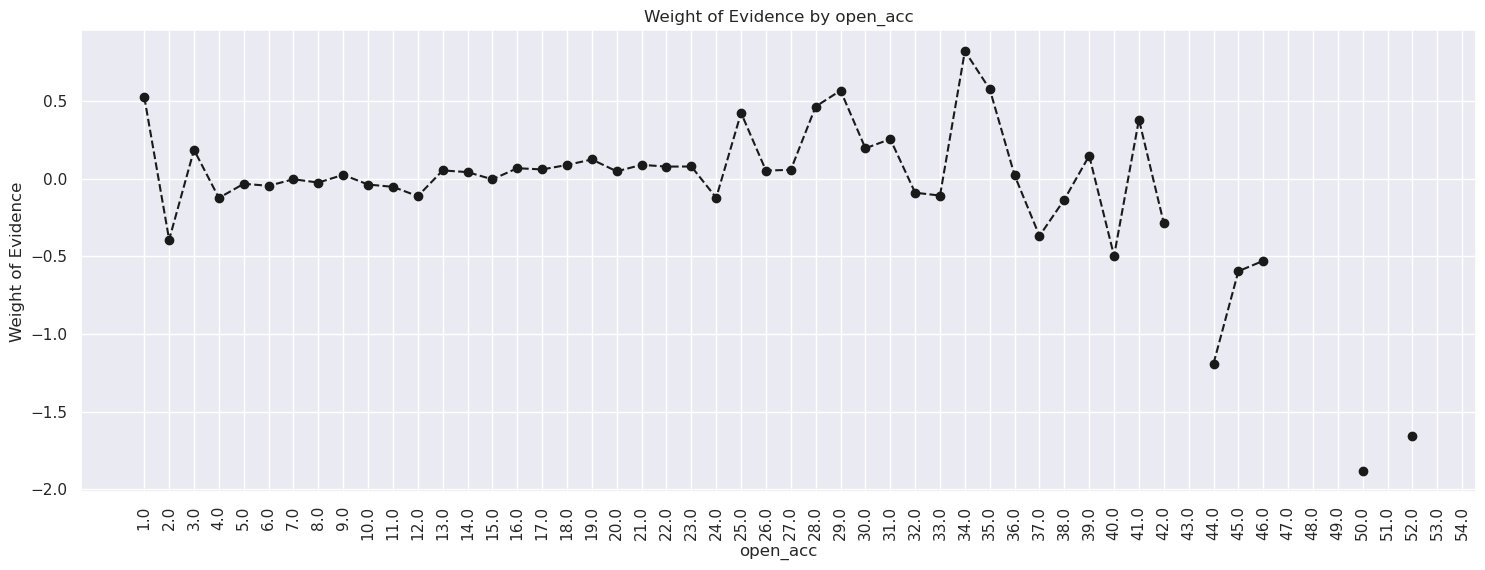

In [129]:
plot_by_woe(df_temp, 90)

In [130]:
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [131]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "pub_rec", df_targets_prepr)
df_temp

pub_rec   n_obs  prop_good  prop_n_obs    n_good   n_bad  prop_n_good  \
0       0.0  346679   0.981594    0.823282  340298.0  6381.0     0.823482   
1       1.0   60215   0.979972    0.142997   59009.0  1206.0     0.142795   
2       2.0    9230   0.982124    0.021919    9065.0   165.0     0.021936   
3       3.0    2876   0.979833    0.006830    2818.0    58.0     0.006819   
4       4.0    1044   0.977011    0.002479    1020.0    24.0     0.002468   
5       5.0     481   0.979210    0.001142     471.0    10.0     0.001140   
6       6.0     249   0.983936    0.000591     245.0     4.0     0.000593   
7       7.0     108   1.000000    0.000256     108.0     0.0     0.000261   
8       8.0      84   1.000000    0.000199      84.0     0.0     0.000203   
9       9.0      34   0.970588    0.000081      33.0     1.0     0.000080   
10     10.0      29   1.000000    0.000069      29.0     0.0     0.000070   
11     11.0      15   0.933333    0.000036      14.0     1.0     0.000034   
12     12.0      14   0.928571    0.000033      13.0     1.0     0.000031   
13     13.0      10   1.000000    0.000024      10.0     0.0     0.000024   
14     14.0       1   1.000000    0.000002       1.0     0.0     0.000002   
15     15.0       5   1.000000    0.000012       5.0     0.0     0.000012   
16     16.0       4   1.000000    0.000009       4.0     0.0     0.000010   
17     17.0       2   1.000000    0.000005       2.0     0.0     0.000005   
18     18.0       3   1.000000    0.000007       3.0     0.0     0.000007   
19     19.0       1   1.000000    0.000002       1.0     0.0     0.000002   
20     20.0       1   1.000000    0.000002       1.0     0.0     0.000002   
21     21.0       3   1.000000    0.000007       3.0     0.0     0.000007   
22     22.0       1   1.000000    0.000002       1.0     0.0     0.000002   
23     23.0       1   1.000000    0.000002       1.0     0.0     0.000002   
24     26.0       1   1.000000    0.000002       1.0     0.0     0.000002   
25     28.0       1   1.000000    0.000002       1.0     0.0     0.000002   
26     49.0       1   1.000000    0.000002       1.0     0.0     0.000002   
27     86.0       1   1.000000    0.000002       1.0     0.0     0.000002   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.812763  0.013102             NaN       NaN  inf  
1     0.153611 -0.073014        0.001622  0.086116  inf  
2     0.021016  0.042836        0.002152  0.115850  inf  
3     0.007388 -0.080055        0.002290  0.122891  inf  
4     0.003057 -0.213891        0.002822  0.133836  inf  
5     0.001274 -0.111122        0.002198  0.102769  inf  
6     0.000509  0.151569        0.004726  0.262691  inf  
7     0.000000       inf        0.016064       inf  inf  
8     0.000000       inf        0.000000       NaN  inf  
9     0.000127 -0.466887        0.029412       inf  inf  
10    0.000000       inf        0.029412       inf  inf  
11    0.000127 -1.324338        0.066667       inf  inf  
12    0.000127 -1.398446        0.004762  0.074108  inf  
13    0.000000       inf        0.071429       inf  inf  
14    0.000000       inf        0.000000       NaN  inf  
15    0.000000       inf        0.000000       NaN  inf  
16    0.000000       inf        0.000000       NaN  inf  
17    0.000000       inf        0.000000       NaN  inf  
18    0.000000       inf        0.000000       NaN  inf  
19    0.000000       inf        0.000000       NaN  inf  
20    0.000000       inf        0.000000       NaN  inf  
21    0.000000       inf        0.000000       NaN  inf  
22    0.000000       inf        0.000000       NaN  inf  
23    0.000000       inf        0.000000       NaN  inf  
24    0.000000       inf        0.000000       NaN  inf  
25    0.000000       inf        0.000000       NaN  inf  
26    0.000000       inf        0.000000       NaN  inf  
27    0.000000       inf        0.000000       NaN  inf

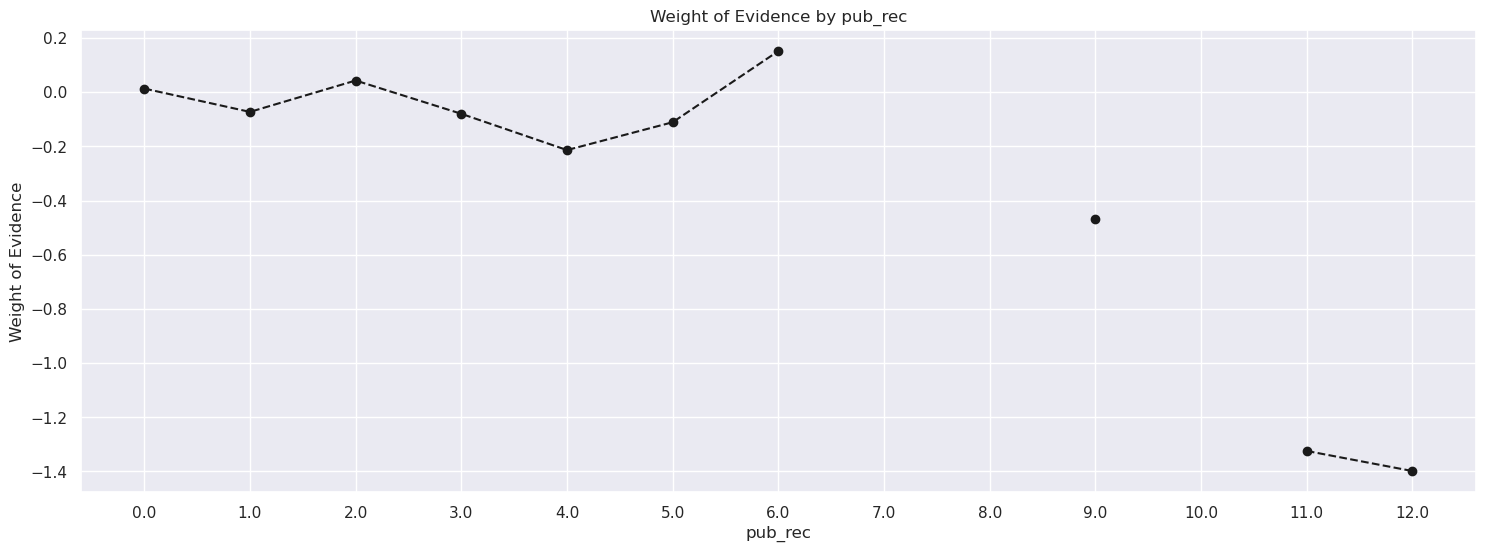

In [132]:
plot_by_woe(df_temp)

In [133]:
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [134]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr, "total_acc", df_targets_prepr)
df_temp

total_acc  n_obs  prop_good  prop_n_obs   n_good  n_bad  prop_n_good  \
0          4.0   1369   0.974434    0.003251   1334.0   35.0     0.003228   
1          5.0   2258   0.977857    0.005362   2208.0   50.0     0.005343   
2          6.0   3192   0.979637    0.007580   3127.0   65.0     0.007567   
3          7.0   4514   0.975410    0.010720   4403.0  111.0     0.010655   
4          8.0   5714   0.978299    0.013569   5590.0  124.0     0.013527   
5          9.0   7052   0.979722    0.016747   6909.0  143.0     0.016719   
6         10.0   8239   0.980823    0.019566   8081.0  158.0     0.019555   
7         11.0   9365   0.981527    0.022240   9192.0  173.0     0.022244   
8         12.0  10418   0.978211    0.024740  10191.0  227.0     0.024661   
9         13.0  11663   0.978908    0.027697  11417.0  246.0     0.027628   
10        14.0  12327   0.980531    0.029274  12087.0  240.0     0.029249   
11        15.0  13023   0.980419    0.030927  12768.0  255.0     0.030897   
12        16.0  13472   0.982111    0.031993  13231.0  241.0     0.032017   
13        17.0  14358   0.979245    0.034097  14060.0  298.0     0.034024   
14        18.0  14618   0.981324    0.034714  14345.0  273.0     0.034713   
15        19.0  14865   0.983451    0.035301  14619.0  246.0     0.035376   
16        20.0  15045   0.980459    0.035728  14751.0  294.0     0.035696   
17        21.0  14922   0.982844    0.035436  14666.0  256.0     0.035490   
18        22.0  15231   0.981223    0.036170  14945.0  286.0     0.036165   
19        23.0  14596   0.980954    0.034662  14318.0  278.0     0.034648   
20        24.0  14652   0.981026    0.034795  14374.0  278.0     0.034783   
21        25.0  14006   0.980723    0.033261  13736.0  270.0     0.033240   
22        26.0  13778   0.980984    0.032720  13516.0  262.0     0.032707   
23        27.0  13150   0.982053    0.031228  12914.0  236.0     0.031250   
24        28.0  12350   0.980324    0.029328  12107.0  243.0     0.029298   
25        29.0  11815   0.984173    0.028058  11628.0  187.0     0.028138   
26        30.0  11328   0.982698    0.026901  11132.0  196.0     0.026938   
27        31.0  10516   0.985736    0.024973  10366.0  150.0     0.025085   
28        32.0   9931   0.980767    0.023584   9740.0  191.0     0.023570   
29        33.0   9093   0.981194    0.021594   8922.0  171.0     0.021590   
30        34.0   8527   0.981705    0.020250   8371.0  156.0     0.020257   
31        35.0   7842   0.983678    0.018623   7714.0  128.0     0.018667   
32        36.0   7319   0.982785    0.017381   7193.0  126.0     0.017406   
33        37.0   6775   0.981402    0.016089   6649.0  126.0     0.016090   
34        38.0   6041   0.981129    0.014346   5927.0  114.0     0.014343   
35        39.0   5717   0.985482    0.013577   5634.0   83.0     0.013634   
36        40.0   5130   0.982261    0.012183   5039.0   91.0     0.012194   
37        41.0   4731   0.983724    0.011235   4654.0   77.0     0.011262   
38        42.0   4283   0.985057    0.010171   4219.0   64.0     0.010209   
39        43.0   3859   0.982379    0.009164   3791.0   68.0     0.009174   
40        44.0   3570   0.978431    0.008478   3493.0   77.0     0.008453   
41        45.0   3206   0.982845    0.007614   3151.0   55.0     0.007625   
42        46.0   2945   0.981324    0.006994   2890.0   55.0     0.006993   
43        47.0   2636   0.978376    0.006260   2579.0   57.0     0.006241   
44        48.0   2326   0.980653    0.005524   2281.0   45.0     0.005520   
45        49.0   2079   0.985089    0.004937   2048.0   31.0     0.004956   
46        50.0   1964   0.981670    0.004664   1928.0   36.0     0.004666   
47        51.0   1732   0.983256    0.004113   1703.0   29.0     0.004121   
48        52.0   1438   0.980529    0.003415   1410.0   28.0     0.003412   
49        53.0   1362   0.984581    0.003234   1341.0   21.0     0.003245   
50        54.0   1194   0.983250    0.002835   1174.0   20.0     0.002841   
5

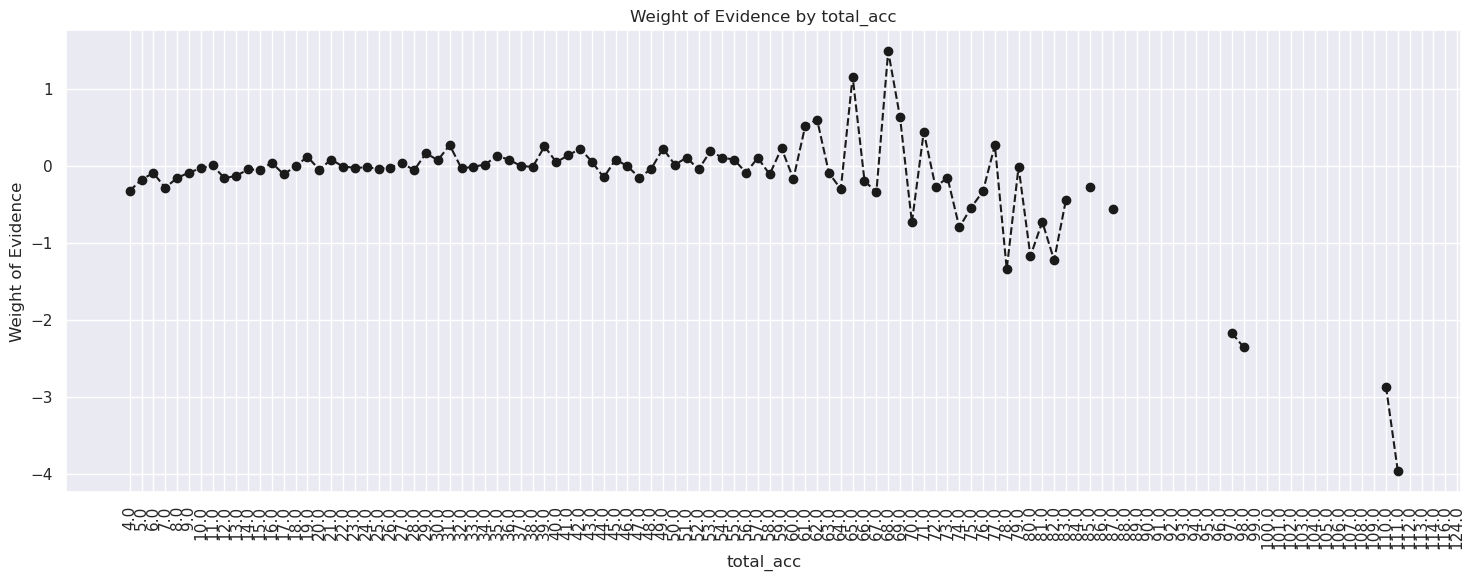

In [135]:
plot_by_woe(df_temp, 90)

In [136]:
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [137]:
df_temp = woe_ordered_continuous(df_inputs_prepr, "acc_now_delinq", df_targets_prepr)
df_temp

acc_now_delinq   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0             0.0  418712   0.981424    0.994343  410934.0  7778.0   
1             1.0    2243   0.971021    0.005327    2178.0    65.0   
2             2.0     116   0.939655    0.000275     109.0     7.0   
3             3.0      17   1.000000    0.000040      17.0     0.0   
4             4.0       3   0.666667    0.000007       2.0     1.0   
5             5.0       1   1.000000    0.000002       1.0     0.0   
6             6.0       1   1.000000    0.000002       1.0     0.0   
7            14.0       1   1.000000    0.000002       1.0     0.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.994412    0.990702  0.003738             NaN       NaN  inf  
1     0.005271    0.008279 -0.451620        0.010403  0.455358  inf  
2     0.000264    0.000892 -1.217957        0.031366  0.766337  inf  
3     0.000041    0.000000       inf        0.060345       inf  inf  
4     0.000005    0.000127 -3.270248        0.333333       inf  inf  
5     0.000002    0.000000       inf        0.333333       inf  inf  
6     0.000002    0.000000       inf        0.000000       NaN  inf  
7     0.000002    0.000000       inf        0.000000       NaN  inf

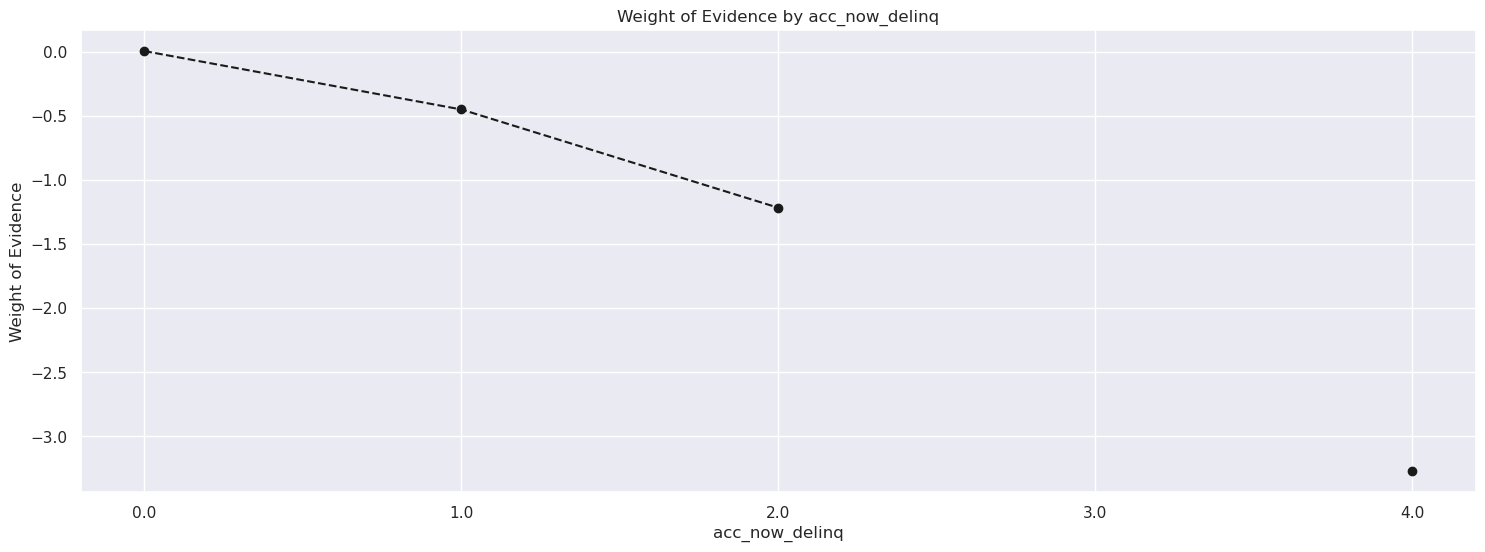

In [138]:
plot_by_woe(df_temp)

In [139]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [140]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

/tmp/ipykernel_11815/2353512927.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_11815/2353512927.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = "columns")
/home/danny/miniconda3/envs/dask/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs   n_good  \
0            (-9999.999, 5000.0]  12981   0.971266    0.030827  12608.0   
1             (5000.0, 9999.999]  42858   0.974801    0.101778  41778.0   
2          (9999.999, 14999.998]  56173   0.977658    0.133398  54918.0   
3         (14999.998, 19999.998]  54873   0.979498    0.130311  53748.0   
4         (19999.998, 24999.997]  46739   0.981942    0.110994  45895.0   
5         (24999.997, 29999.997]  38749   0.981883    0.092020  38047.0   
6         (29999.997, 34999.996]  31075   0.983073    0.073796  30549.0   
7         (34999.996, 39999.996]  24932   0.982071    0.059208  24485.0   
8         (39999.996, 44999.996]  20201   0.983912    0.047973  19876.0   
9         (44999.996, 49999.995]  16418   0.986113    0.038989  16190.0   
10        (49999.995, 54999.994]  13224   0.985405    0.031404  13031.0   
11        (54999.994, 59999.994]  10621   0.987195    0.025222  10485.0   
12        (59999.994, 64999.994]   8361   0.987442    0.019855   8256.0   
13        (64999.994, 69999.993]   6894   0.986075    0.016372   6798.0   
14        (69999.993, 74999.992]   5547   0.986840    0.013173   5474.0   
15        (74999.992, 79999.992]   4515   0.987154    0.010722   4457.0   
16        (79999.992, 84999.992]   3662   0.990442    0.008696   3627.0   
17        (84999.992, 89999.991]   3102   0.990651    0.007367   3073.0   
18         (89999.991, 94999.99]   2650   0.986038    0.006293   2613.0   
19          (94999.99, 99999.99]   2163   0.992603    0.005137   2147.0   
20         (99999.99, 104999.99]   1830   0.990710    0.004346   1813.0   
21       (104999.99, 109999.989]   1543   0.988983    0.003664   1526.0   
22      (109999.989, 114999.988]   1340   0.984328    0.003182   1319.0   
23      (114999.988, 119999.988]   1178   0.991511    0.002797   1168.0   
24      (119999.988, 124999.988]    961   0.991675    0.002282    953.0   
25      (124999.988, 129999.987]    816   0.995098    0.001938    812.0   
26      (129999.987, 134999.986]    780   0.991026    0.001852    773.0   
27      (134999.986, 139999.986]    633   0.993681    0.001503    629.0   
28      (139999.986, 144999.986]    531   0.986817    0.001261    524.0   
29      (144999.986, 149999.985]    468   0.993590    0.001111    465.0   
30      (149999.985, 154999.984]    420   0.983333    0.000997    413.0   
31      (154999.984, 159999.984]    404   0.982673    0.000959    397.0   
32      (159999.984, 164999.984]    361   0.997230    0.000857    360.0   
33      (164999.984, 169999.983]    336   0.991071    0.000798    333.0   
34      (169999.983, 174999.982]    283   0.989399    0.000672    280.0   
35      (174999.982, 179999.982]    242   0.987603    0.000575    239.0   
36      (179999.982, 184999.982]    237   0.978903    0.000563    232.0   
37      (184999.982, 189999.981]    225   0.977778    0.000534    220.0   
38       (189999.981, 194999.98]    175   0.994286    0.000416    174.0   
39        (194999.98, 199999.98]    166   0.987952    0.000394    164.0   
40        (199999.98, 204999.98]    167   1.000000    0.000397    167.0   
41       (204999.98, 209999.979]    152   0.993421    0.000361    151.0   
42      (209999.979, 214999.978]    136   0.977941    0.000323    133.0   
43      (214999.978, 219999.978]    127   0.976378    0.000302    124.0   
44      (219999.978, 224999.978]    129   0.992248    0.000306    128.0   
45      (224999.978, 229999.977]    105   0.990476    0.000249    104.0   
46      (229999.977, 234999.976]    120   0.991667    0.000285    119.0   
47      (234999.976, 239999.976]     86   1.000000    0.000204     86.0   
48      (239999.976, 244999.976]     84   1.000000    0.000199     84.0   
49      (244999.976, 249999.975]     57   0.982456    0.000135     56.0   
50      (249999.975, 254999.974]     61   0.983607    0.000145     60.0   
51      (254999.974, 259999.974]     64   0.953125    0.000152     61.0   
52      (259999.974, 264999.974]  

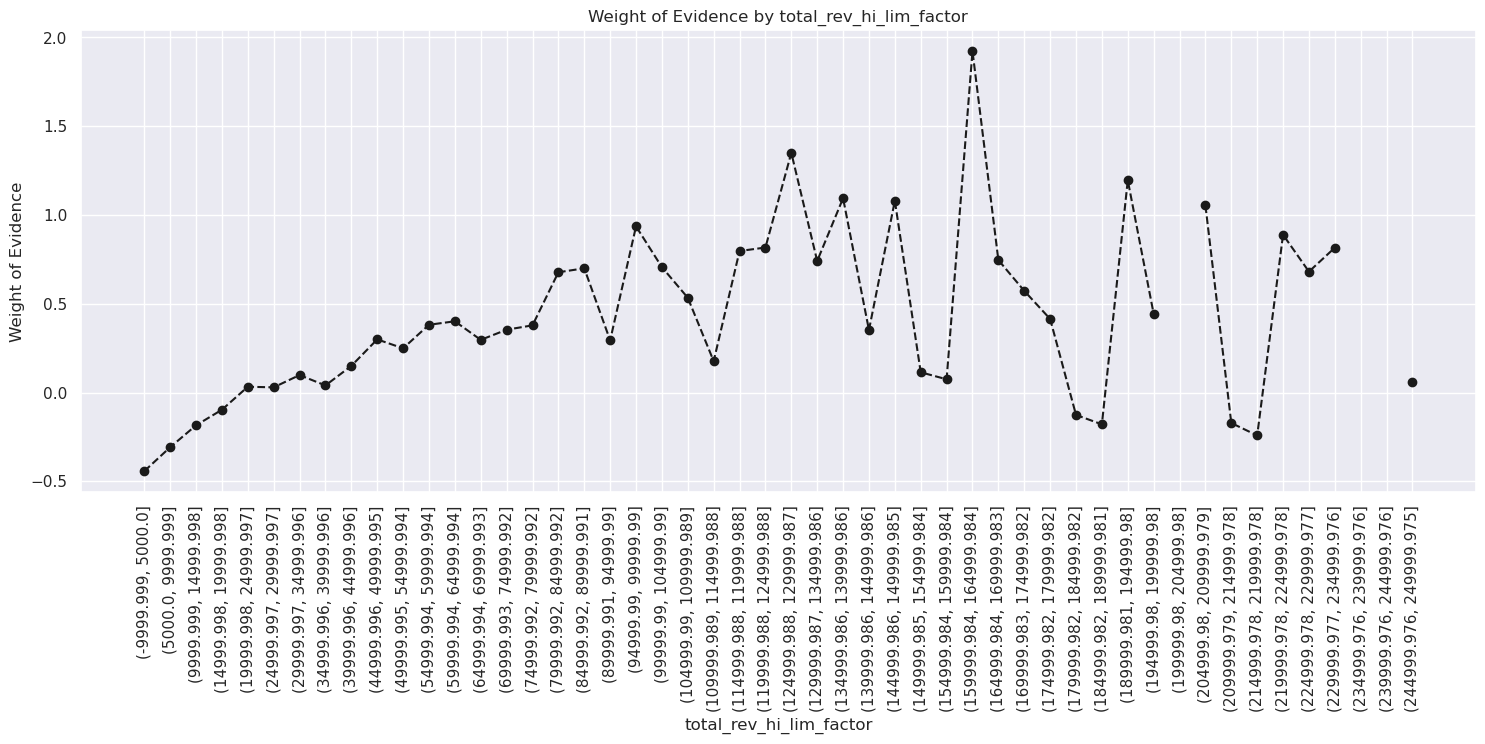

In [141]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [142]:
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [143]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

/tmp/ipykernel_11815/2353512927.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_11815/2353512927.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = "columns")


installment_factor  n_obs  prop_good  prop_n_obs   n_good  n_bad  \
0       (28.705, 58.427]   3506   0.982886    0.008326   3446.0   60.0   
1       (58.427, 86.734]   5832   0.981310    0.013850   5723.0  109.0   
2       (86.734, 115.04]   8123   0.983134    0.019290   7986.0  137.0   
3      (115.04, 143.347]   9139   0.982383    0.021703   8978.0  161.0   
4     (143.347, 171.654]  17953   0.984459    0.042634  17674.0  279.0   
5     (171.654, 199.961]  15515   0.985691    0.036845  15293.0  222.0   
6     (199.961, 228.268]  16515   0.982864    0.039219  16232.0  283.0   
7     (228.268, 256.574]  22043   0.983033    0.052347  21669.0  374.0   
8     (256.574, 284.881]  25323   0.980966    0.060136  24841.0  482.0   
9     (284.881, 313.188]  24135   0.980443    0.057315  23663.0  472.0   
10    (313.188, 341.495]  28788   0.982771    0.068365  28292.0  496.0   
11    (341.495, 369.802]  20609   0.978844    0.048942  20173.0  436.0   
12    (369.802, 398.108]  21869   0.981572    0.051934  21466.0  403.0   
13    (398.108, 426.415]  15594   0.978068    0.037032  15252.0  342.0   
14    (426.415, 454.722]  13310   0.982119    0.031608  13072.0  238.0   
15    (454.722, 483.029]  19281   0.984441    0.045788  18981.0  300.0   
16    (483.029, 511.336]  19023   0.983126    0.045175  18702.0  321.0   
17    (511.336, 539.642]  12597   0.976740    0.029915  12304.0  293.0   
18    (539.642, 567.949]  12682   0.979972    0.030117  12428.0  254.0   
19    (567.949, 596.256]   9797   0.979994    0.023266   9601.0  196.0   
20    (596.256, 624.563]   9996   0.980692    0.023738   9803.0  193.0   
21     (624.563, 652.87]  11278   0.984572    0.026783  11104.0  174.0   
22     (652.87, 681.176]  10696   0.981582    0.025401  10499.0  197.0   
23    (681.176, 709.483]   6952   0.977273    0.016509   6794.0  158.0   
24     (709.483, 737.79]   4753   0.980013    0.011287   4658.0   95.0   
25     (737.79, 766.097]   7827   0.984668    0.018587   7707.0  120.0   
26    (766.097, 794.404]   7850   0.986242    0.018642   7742.0  108.0   
27     (794.404, 822.71]   5084   0.979150    0.012073   4978.0  106.0   
28     (822.71, 851.017]   4503   0.978015    0.010694   4404.0   99.0   
29    (851.017, 879.324]   4938   0.984407    0.011727   4861.0   77.0   
30    (879.324, 907.631]   4222   0.968735    0.010026   4090.0  132.0   
31    (907.631, 935.938]   2392   0.979933    0.005680   2344.0   48.0   
32    (935.938, 964.244]   2450   0.973878    0.005818   2386.0   64.0   
33    (964.244, 992.551]   2208   0.972373    0.005243   2147.0   61.0   
34   (992.551, 1020.858]   1627   0.974800    0.003864   1586.0   41.0   
35  (1020.858, 1049.165]   1256   0.952229    0.002983   1196.0   60.0   
36  (1049.165, 1077.472]    854   0.978923    0.002028    836.0   18.0   
37  (1077.472, 1105.778]   2504   0.986821    0.005946   2471.0   33.0   
38  (1105.778, 1134.085]   1665   0.988589    0.003954   1646.0   19.0   
39  (1134.085, 1162.392]   1206   0.985075    0.002864   1188.0   18.0   
40  (1162.392, 1190.699]   1928   0.983921    0.004579   1897.0   31.0   
41  (1190.699, 1219.006]   1008   0.979167    0.002394    987.0   21.0   
42  (1219.006, 1247.312]    779   0.952503    0.001850    742.0   37.0   
43  (1247.312, 1275.619]   1178   0.950764    0.002797   1120.0   58.0   
44  (1275.619, 1303.926]    215   0.948837    0.000511    204.0   11.0   
45  (1303.926, 1332.233]     47   0.851064    0.000112     40.0    7.0   
46   (1332.233, 1360.54]     25   0.800000    0.000059     20.0    5.0   
47   (1360.54, 1388.846]     11   0.909091    0.000026     10.0    1.0   
48  (1388.846, 1417.153]      4   1.000000    0.000009      4.0    0.0   
49   (1417.153, 1445.46]      4   0.750000    0.000009      3.0    1.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.008339    0.007642  0.087230             NaN       NaN  inf  
1      0.013849    0.013884 -0.002494        0.001576  0.089724  inf  
2      0.019325   

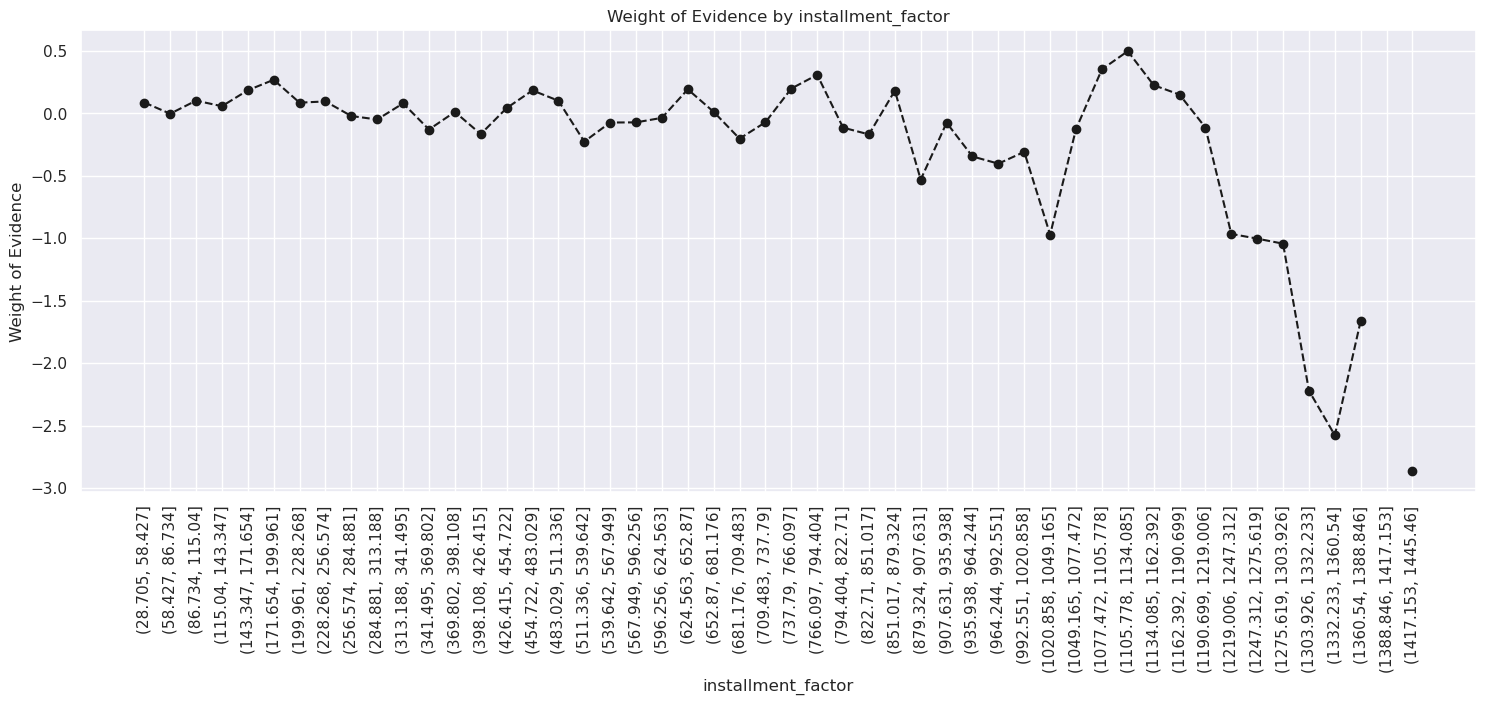

In [144]:
plot_by_woe(df_temp, 90)

In [145]:
df_inputs_prepr["annual_inc"].max()

9500000.0

In [146]:
df_inputs_prepr["annual_inc_factor"] = pd.cut(df_inputs_prepr["annual_inc"], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

/tmp/ipykernel_11815/2353512927.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_11815/2353512927.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = "columns")


annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0       (-9500.0, 95000.0]  325648   0.980203    0.773338  319201.0  6447.0   
1      (95000.0, 190000.0]   84045   0.985032    0.199587   82787.0  1258.0   
2     (190000.0, 285000.0]    8186   0.986196    0.019440    8073.0   113.0   
3     (285000.0, 380000.0]    1821   0.988468    0.004324    1800.0    21.0   
4     (380000.0, 475000.0]     652   0.990798    0.001548     646.0     6.0   
5     (475000.0, 570000.0]     291   0.989691    0.000691     288.0     3.0   
6     (570000.0, 665000.0]     165   1.000000    0.000392     165.0     0.0   
7     (665000.0, 760000.0]      92   1.000000    0.000218      92.0     0.0   
8     (760000.0, 855000.0]      46   1.000000    0.000109      46.0     0.0   
9     (855000.0, 950000.0]      24   1.000000    0.000057      24.0     0.0   
10   (950000.0, 1045000.0]      31   1.000000    0.000074      31.0     0.0   
11  (1045000.0, 1140000.0]      12   1.000000    0.000028      12.0     0.0   
12  (1140000.0, 1235000.0]       8   1.000000    0.000019       8.0     0.0   
13  (1235000.0, 1330000.0]      12   0.916667    0.000028      11.0     1.0   
14  (1330000.0, 1425000.0]       5   1.000000    0.000012       5.0     0.0   
15  (1425000.0, 1520000.0]       9   1.000000    0.000021       9.0     0.0   
16  (1520000.0, 1615000.0]       0        NaN    0.000000       NaN     NaN   
17  (1615000.0, 1710000.0]       3   0.666667    0.000007       2.0     1.0   
18  (1710000.0, 1805000.0]       3   1.000000    0.000007       3.0     0.0   
19  (1805000.0, 1900000.0]       2   1.000000    0.000005       2.0     0.0   
20  (1900000.0, 1995000.0]       1   1.000000    0.000002       1.0     0.0   
21  (1995000.0, 2090000.0]       1   1.000000    0.000002       1.0     0.0   
22  (2090000.0, 2185000.0]       3   1.000000    0.000007       3.0     0.0   
23  (2185000.0, 2280000.0]       1   1.000000    0.000002       1.0     0.0   
24  (2280000.0, 2375000.0]       2   1.000000    0.000005       2.0     0.0   
25  (2375000.0, 2470000.0]       0        NaN    0.000000       NaN     NaN   
26  (2470000.0, 2565000.0]       2   1.000000    0.000005       2.0     0.0   
27  (2565000.0, 2660000.0]       0        NaN    0.000000       NaN     NaN   
28  (2660000.0, 2755000.0]       0        NaN    0.000000       NaN     NaN   
29  (2755000.0, 2850000.0]       0        NaN    0.000000       NaN     NaN   
30  (2850000.0, 2945000.0]       1   1.000000    0.000002       1.0     0.0   
31  (2945000.0, 3040000.0]       2   1.000000    0.000005       2.0     0.0   
32  (3040000.0, 3135000.0]       1   1.000000    0.000002       1.0     0.0   
33  (3135000.0, 3230000.0]       1   1.000000    0.000002       1.0     0.0   
34  (3230000.0, 3325000.0]       0        NaN    0.000000       NaN     NaN   
35  (3325000.0, 3420000.0]       0        NaN    0.000000       NaN     NaN   
36  (3420000.0, 3515000.0]       0        NaN    0.000000       NaN     NaN   
37  (3515000.0, 3610000.0]       0        NaN    0.000000       NaN     NaN   
38  (3610000.0, 3705000.0]       0        NaN    0.000000       NaN     NaN   
39  (3705000.0, 3800000.0]       0        NaN    0.000000       NaN     NaN   
40  (3800000.0, 3895000.0]       0        NaN    0.000000       NaN     NaN   
41  (3895000.0, 3990000.0]       1   1.000000    0.000002       1.0     0.0   
42  (3990000.0, 4085000.0]       1   1.000000    0.000002       1.0     0.0   
43  (4085000.0, 4180000.0]       0        NaN    0.000000       NaN     NaN   
44  (4180000.0, 4275000.0]       0        NaN    0.000000       NaN     NaN   
45  (4275000.0, 4370000.0]       2   1.000000    0.000005       2.0     0.0   
46  (4370000.0, 4465000.0]       0        NaN    0.000000       NaN     NaN   
47  (4465000.0, 4560000.0]       0        NaN    0.000000       NaN     NaN   
48  (4560000.0, 4655000.0]       1   1.000000    0.000002       1.0     0.0   
49  (4655000.0, 4750000.0]       1   1.000000    0.000002  

most of the data (90%) fall into low 2 tier; split analysis for low tier/ high tier

In [147]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]

In [148]:
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/tmp/ipykernel_11815/25049378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
/tmp/ipykernel_11815/2353512927.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_11815/2353512927.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obs

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good  n_bad  \
0       (-140.0, 2800.0]      4   1.000000    0.000010      4.0    0.0   
1       (2800.0, 5600.0]     12   0.916667    0.000031     11.0    1.0   
2       (5600.0, 8400.0]     55   0.981818    0.000141     54.0    1.0   
3      (8400.0, 11200.0]    429   0.965035    0.001097    414.0   15.0   
4     (11200.0, 14000.0]    873   0.977090    0.002233    853.0   20.0   
5     (14000.0, 16800.0]   1339   0.973114    0.003425   1303.0   36.0   
6     (16800.0, 19600.0]   1808   0.966814    0.004624   1748.0   60.0   
7     (19600.0, 22400.0]   3823   0.972273    0.009778   3717.0  106.0   
8     (22400.0, 25200.0]   6445   0.973933    0.016485   6277.0  168.0   
9     (25200.0, 28000.0]   5904   0.977134    0.015101   5769.0  135.0   
10    (28000.0, 30800.0]   8968   0.974019    0.022938   8735.0  233.0   
11    (30800.0, 33600.0]   8605   0.976293    0.022010   8401.0  204.0   
12    (33600.0, 36400.0]  14614   0.976803    0.037380  14275.0  339.0   
13    (36400.0, 39200.0]   9747   0.976300    0.024931   9516.0  231.0   
14    (39200.0, 42000.0]  20957   0.977287    0.053604  20481.0  476.0   
15    (42000.0, 44800.0]   7486   0.979428    0.019148   7332.0  154.0   
16    (44800.0, 47600.0]  18165   0.979191    0.046462  17787.0  378.0   
17    (47600.0, 50400.0]  24554   0.979963    0.062804  24062.0  492.0   
18    (50400.0, 53200.0]  12921   0.981967    0.033049  12688.0  233.0   
19    (53200.0, 56000.0]  18407   0.981909    0.047081  18074.0  333.0   
20    (56000.0, 58800.0]   7766   0.977981    0.019864   7595.0  171.0   
21    (58800.0, 61600.0]  20831   0.980702    0.053281  20429.0  402.0   
22    (61600.0, 64400.0]  10082   0.982841    0.025788   9909.0  173.0   
23    (64400.0, 67200.0]  17704   0.982038    0.045283  17386.0  318.0   
24    (67200.0, 70000.0]  17956   0.983070    0.045928  17652.0  304.0   
25    (70000.0, 72800.0]   7841   0.983676    0.020056   7713.0  128.0   
26    (72800.0, 75600.0]  15452   0.982850    0.039523  15187.0  265.0   
27    (75600.0, 78400.0]   6675   0.980974    0.017073   6548.0  127.0   
28    (78400.0, 81200.0]  14475   0.982038    0.037024  14215.0  260.0   
29    (81200.0, 84000.0]   6859   0.981047    0.017544   6729.0  130.0   
30    (84000.0, 86800.0]  10260   0.982554    0.026243  10081.0  179.0   
31    (86800.0, 89600.0]   4986   0.985560    0.012753   4914.0   72.0   
32    (89600.0, 92400.0]  11984   0.984312    0.030653  11796.0  188.0   
33    (92400.0, 95200.0]   7715   0.984964    0.019733   7599.0  116.0   
34    (95200.0, 98000.0]   5317   0.984014    0.013600   5232.0   85.0   
35   (98000.0, 100800.0]  10251   0.983416    0.026220  10081.0  170.0   
36  (100800.0, 103600.0]   3706   0.981921    0.009479   3639.0   67.0   
37  (103600.0, 106400.0]   5582   0.985668    0.014278   5502.0   80.0   
38  (106400.0, 109200.0]   2814   0.984364    0.007198   2770.0   44.0   
39  (109200.0, 112000.0]   7067   0.987406    0.018076   6978.0   89.0   
40  (112000.0, 114800.0]   1321   0.990159    0.003379   1308.0   13.0   
41  (114800.0, 117600.0]   3842   0.989328    0.009827   3801.0   41.0   
42  (117600.0, 120400.0]   7803   0.982058    0.019958   7663.0  140.0   
43  (120400.0, 123200.0]   1197   0.990810    0.003062   1186.0   11.0   
44  (123200.0, 126000.0]   4648   0.983864    0.011889   4573.0   75.0   
45  (126000.0, 128800.0]    981   0.982671    0.002509    964.0   17.0   
46  (128800.0, 131600.0]   3885   0.987902    0.009937   3838.0   47.0   
47  (131600.0, 134400.0]    971   0.992791    0.002484    964.0    7.0   
48  (134400.0, 137200.0]   2552   0.984326    0.006527   2512.0   40.0   
49  (137200.0, 140000.0]   3323   0.986157    0.008500   3277.0   46.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.000010    0.000000       inf             NaN       NaN  inf  
1      0.000029    0.000135 -1.547375        0.083333       inf  inf  
2      0.000141    

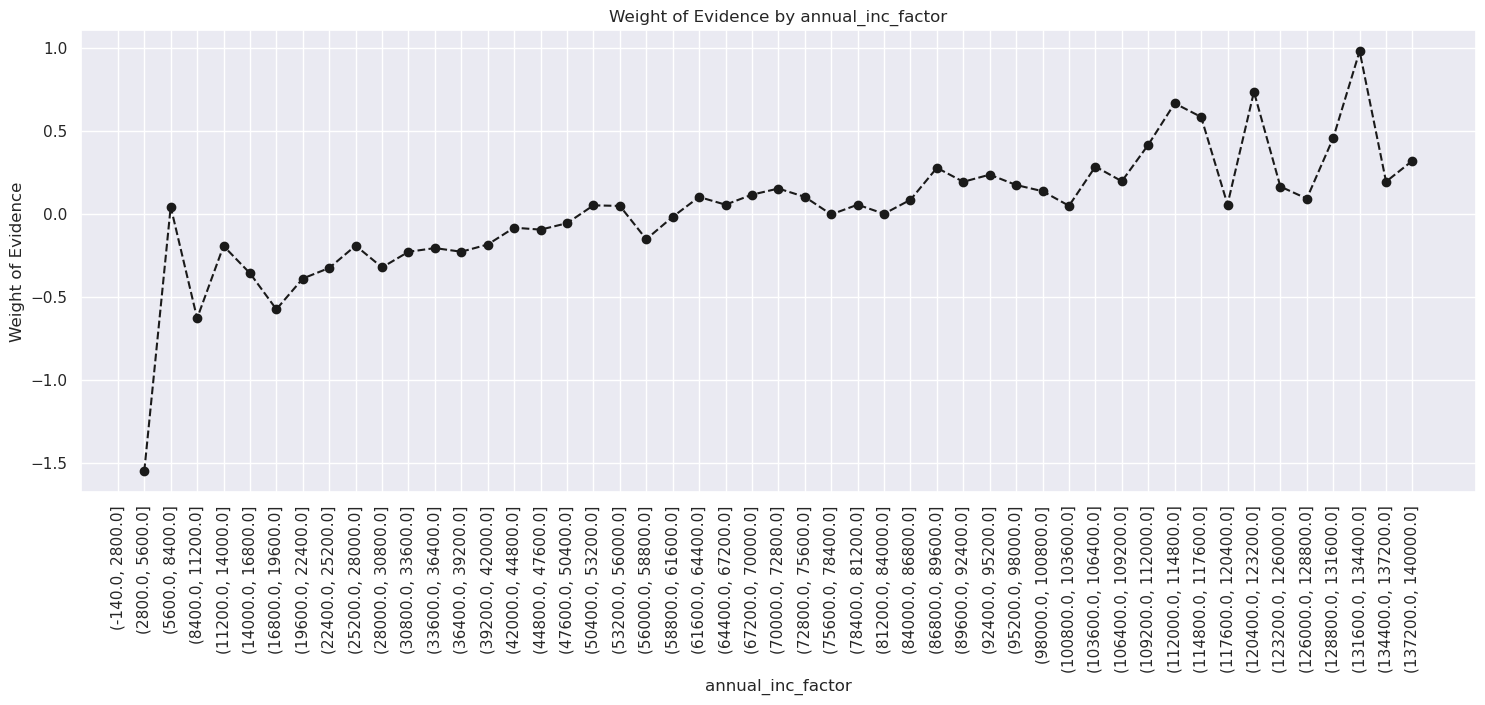

In [149]:
plot_by_woe(df_temp, 90)

In [150]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [151]:
df_inputs_prepr["mths_since_last_delinq"].isnull().sum()/df_inputs_prepr.shape[0]

0.4843597866509615

In [152]:
df_inputs_prepr_temp = df_inputs_prepr[df_inputs_prepr["mths_since_last_delinq"].notnull()]

df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/tmp/ipykernel_11815/3877888703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
/tmp/ipykernel_11815/2353512927.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_11815/2353512927.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to reta

mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                 (-0.176, 3.52]   7261   0.973833    0.033440   7071.0   
1                   (3.52, 7.04]  15763   0.978367    0.072596  15422.0   
2                  (7.04, 10.56]  12365   0.980348    0.056947  12122.0   
3                 (10.56, 14.08]  16125   0.979721    0.074263  15798.0   
4                  (14.08, 17.6]  11384   0.976985    0.052429  11122.0   
5                  (17.6, 21.12]  14291   0.983626    0.065817  14057.0   
6                 (21.12, 24.64]  10544   0.982170    0.048560  10356.0   
7                 (24.64, 28.16]  13761   0.981760    0.063376  13510.0   
8                 (28.16, 31.68]   9867   0.985001    0.045442   9719.0   
9                  (31.68, 35.2]  12583   0.985218    0.057951  12397.0   
10                 (35.2, 38.72]   8869   0.980268    0.040846   8694.0   
11                (38.72, 42.24]  11025   0.981678    0.050775  10823.0   
12                (42.24, 45.76]   8005   0.984260    0.036867   7879.0   
13                (45.76, 49.28]   9697   0.981025    0.044659   9513.0   
14                 (49.28, 52.8]   5298   0.983012    0.024400   5208.0   
15                 (52.8, 56.32]   7492   0.979979    0.034504   7342.0   
16                (56.32, 59.84]   5786   0.980816    0.026647   5675.0   
17                (59.84, 63.36]   7743   0.982048    0.035660   7604.0   
18                (63.36, 66.88]   5785   0.982714    0.026643   5685.0   
19                 (66.88, 70.4]   7266   0.985962    0.033463   7164.0   
20                 (70.4, 73.92]   4913   0.981885    0.022627   4824.0   
21                (73.92, 77.44]   5702   0.982988    0.026260   5605.0   
22                (77.44, 80.96]   3639   0.981314    0.016759   3571.0   
23                (80.96, 84.48]   1650   0.983030    0.007599   1622.0   
24                 (84.48, 88.0]    106   0.962264    0.000488    102.0   
25                 (88.0, 91.52]     40   0.950000    0.000184     38.0   
26                (91.52, 95.04]     40   0.950000    0.000184     38.0   
27                (95.04, 98.56]     20   1.000000    0.000092     20.0   
28               (98.56, 102.08]     28   1.000000    0.000129     28.0   
29               (102.08, 105.6]     11   1.000000    0.000051     11.0   
30               (105.6, 109.12]     19   1.000000    0.000088     19.0   
31              (109.12, 112.64]     10   1.000000    0.000046     10.0   
32              (112.64, 116.16]     10   1.000000    0.000046     10.0   
33              (116.16, 119.68]      5   1.000000    0.000023      5.0   
34               (119.68, 123.2]     11   1.000000    0.000051     11.0   
35               (123.2, 126.72]      1   1.000000    0.000005      1.0   
36              (126.72, 130.24]      2   1.000000    0.000009      2.0   
37              (130.24, 133.76]      2   1.000000    0.000009      2.0   
38              (133.76, 137.28]      2   1.000000    0.000009      2.0   
39               (137.28, 140.8]      0        NaN    0.000000      NaN   
40               (140.8, 144.32]      1   1.000000    0.000005      1.0   
41              (144.32, 147.84]      2   1.000000    0.000009      2.0   
42              (147.84, 151.36]      1   1.000000    0.000005      1.0   
43              (151.36, 154.88]      3   1.000000    0.000014      3.0   
44               (154.88, 158.4]      1   1.000000    0.000005      1.0   
45               (158.4, 161.92]      0        NaN    0.000000      NaN   
46              (161.92, 165.44]      0        NaN    0.000000      NaN   
47              (165.44, 168.96]      0        NaN    0.000000      NaN   
48              (168.96, 172.48]      3   1.000000    0.000014      3.0   
49               (172.48, 176.0]      1   1.000000    0.000005      1.0   

    n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   190.0     0.033183    0.047041 -0.349003             NaN       NaN  inf  
1   341.0     0.07237

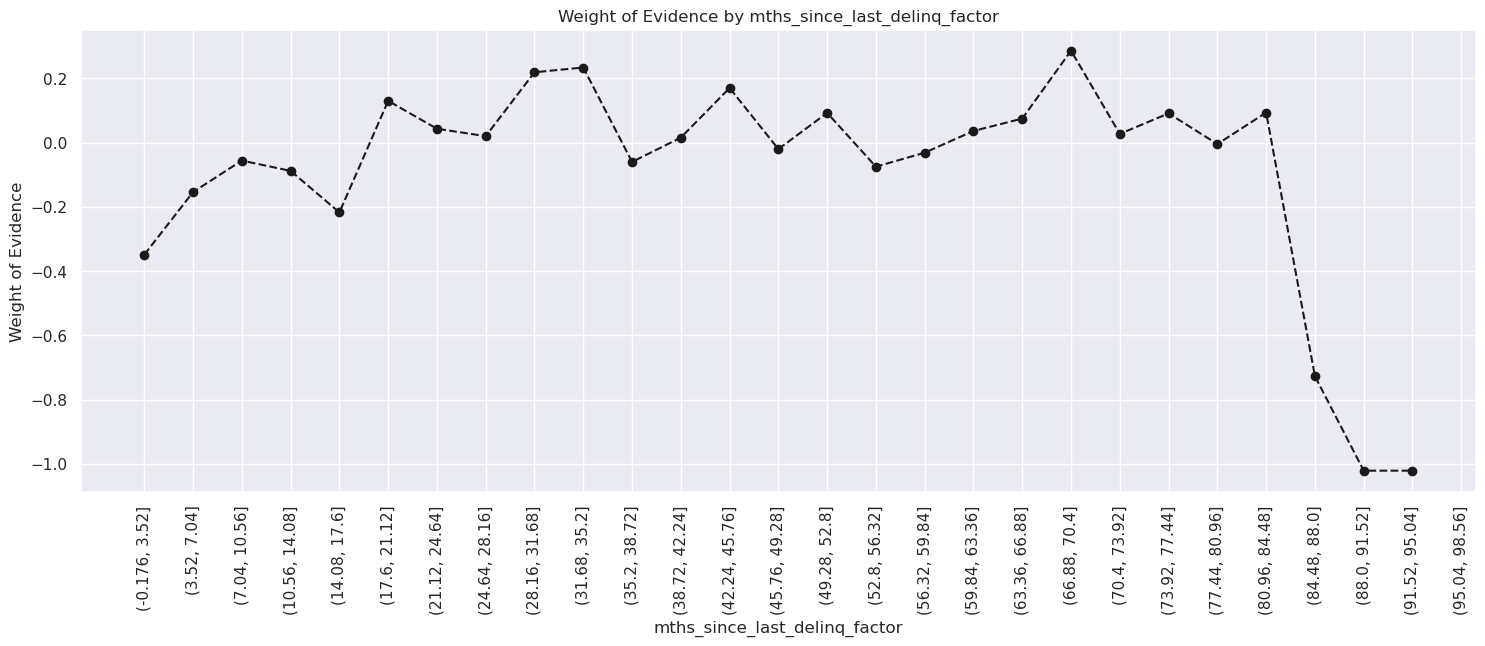

In [153]:
plot_by_woe(df_temp, 90)

In [154]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

homework #2

In [155]:
len(df_inputs_prepr["dti"].unique())

4086

In [156]:
df_inputs_prepr["dti_factor"] = pd.cut(df_inputs_prepr["dti"], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

/tmp/ipykernel_11815/2353512927.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_11815/2353512927.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = "columns")


dti_factor   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0     (-9.999, 199.98]  421089   0.981355    0.999988  413238.0  7851.0   
1     (199.98, 399.96]       1   1.000000    0.000002       1.0     0.0   
2     (399.96, 599.94]       0        NaN    0.000000       NaN     NaN   
3     (599.94, 799.92]       1   1.000000    0.000002       1.0     0.0   
4      (799.92, 999.9]       0        NaN    0.000000       NaN     NaN   
5     (999.9, 1199.88]       1   1.000000    0.000002       1.0     0.0   
6   (1199.88, 1399.86]       0        NaN    0.000000       NaN     NaN   
7   (1399.86, 1599.84]       0        NaN    0.000000       NaN     NaN   
8   (1599.84, 1799.82]       0        NaN    0.000000       NaN     NaN   
9    (1799.82, 1999.8]       0        NaN    0.000000       NaN     NaN   
10   (1999.8, 2199.78]       0        NaN    0.000000       NaN     NaN   
11  (2199.78, 2399.76]       0        NaN    0.000000       NaN     NaN   
12  (2399.76, 2599.74]       0        NaN    0.000000       NaN     NaN   
13  (2599.74, 2799.72]       0        NaN    0.000000       NaN     NaN   
14   (2799.72, 2999.7]       0        NaN    0.000000       NaN     NaN   
15   (2999.7, 3199.68]       0        NaN    0.000000       NaN     NaN   
16  (3199.68, 3399.66]       0        NaN    0.000000       NaN     NaN   
17  (3399.66, 3599.64]       0        NaN    0.000000       NaN     NaN   
18  (3599.64, 3799.62]       0        NaN    0.000000       NaN     NaN   
19   (3799.62, 3999.6]       0        NaN    0.000000       NaN     NaN   
20   (3999.6, 4199.58]       0        NaN    0.000000       NaN     NaN   
21  (4199.58, 4399.56]       0        NaN    0.000000       NaN     NaN   
22  (4399.56, 4599.54]       0        NaN    0.000000       NaN     NaN   
23  (4599.54, 4799.52]       0        NaN    0.000000       NaN     NaN   
24   (4799.52, 4999.5]       0        NaN    0.000000       NaN     NaN   
25   (4999.5, 5199.48]       0        NaN    0.000000       NaN     NaN   
26  (5199.48, 5399.46]       0        NaN    0.000000       NaN     NaN   
27  (5399.46, 5599.44]       0        NaN    0.000000       NaN     NaN   
28  (5599.44, 5799.42]       0        NaN    0.000000       NaN     NaN   
29   (5799.42, 5999.4]       0        NaN    0.000000       NaN     NaN   
30   (5999.4, 6199.38]       0        NaN    0.000000       NaN     NaN   
31  (6199.38, 6399.36]       0        NaN    0.000000       NaN     NaN   
32  (6399.36, 6599.34]       0        NaN    0.000000       NaN     NaN   
33  (6599.34, 6799.32]       0        NaN    0.000000       NaN     NaN   
34   (6799.32, 6999.3]       0        NaN    0.000000       NaN     NaN   
35   (6999.3, 7199.28]       0        NaN    0.000000       NaN     NaN   
36  (7199.28, 7399.26]       0        NaN    0.000000       NaN     NaN   
37  (7399.26, 7599.24]       0        NaN    0.000000       NaN     NaN   
38  (7599.24, 7799.22]       0        NaN    0.000000       NaN     NaN   
39   (7799.22, 7999.2]       0        NaN    0.000000       NaN     NaN   
40   (7999.2, 8199.18]       0        NaN    0.000000       NaN     NaN   
41  (8199.18, 8399.16]       0        NaN    0.000000       NaN     NaN   
42  (8399.16, 8599.14]       0        NaN    0.000000       NaN     NaN   
43  (8599.14, 8799.12]       0        NaN    0.000000       NaN     NaN   
44   (8799.12, 8999.1]       0        NaN    0.000000       NaN     NaN   
45   (8999.1, 9199.08]       0        NaN    0.000000       NaN     NaN   
46  (9199.08, 9399.06]       0        NaN    0.000000       NaN     NaN   
47  (9399.06, 9599.04]       0        NaN    0.000000       NaN     NaN   
48  (9599.04, 9799.02]       0        NaN    0.000000       NaN     NaN   
49   (9799.02, 9999.0]       2   1.000000    0.000005       2.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.999988         1.0 -0.000012             NaN       NaN  inf  
1      0.000002         0.0       inf       

data very skew to very low dti , should

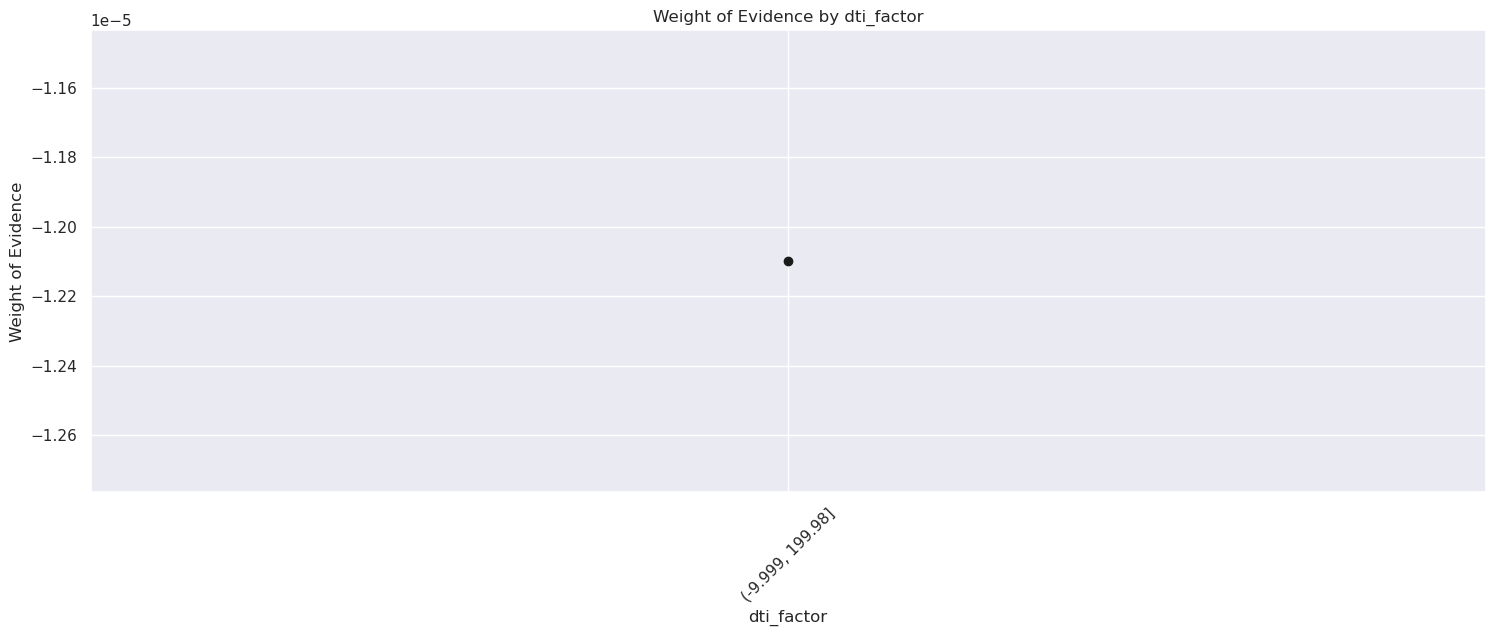

In [157]:
plot_by_woe(df_temp, 45)

In [158]:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

/tmp/ipykernel_11815/3828360169.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
/tmp/ipykernel_11815/3828360169.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
/tmp/ipykernel_11815/3828360169.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

In [159]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/tmp/ipykernel_11815/770603847.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
/tmp/ipykernel_11815/770603847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
/tmp/ipykernel_11815/2353512927.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in

mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                   (-0.12, 2.4]     87   0.965517    0.001169    84.0    3.0   
1                     (2.4, 4.8]    161   0.968944    0.002164   156.0    5.0   
2                     (4.8, 7.2]    344   0.976744    0.004623   336.0    8.0   
3                     (7.2, 9.6]    291   0.982818    0.003911   286.0    5.0   
4                    (9.6, 12.0]    537   0.970205    0.007216   521.0   16.0   
5                   (12.0, 14.4]    404   0.985149    0.005429   398.0    6.0   
6                   (14.4, 16.8]    410   0.980488    0.005510   402.0    8.0   
7                   (16.8, 19.2]    693   0.987013    0.009313   684.0    9.0   
8                   (19.2, 21.6]    521   0.986564    0.007001   514.0    7.0   
9                   (21.6, 24.0]    825   0.979394    0.011086   808.0   17.0   
10                  (24.0, 26.4]    653   0.973966    0.008775   636.0   17.0   
11                  (26.4, 28.8]    742   0.978437    0.009971   726.0   16.0   
12                  (28.8, 31.2]   1241   0.984690    0.016677  1222.0   19.0   
13                  (31.2, 33.6]    936   0.986111    0.012578   923.0   13.0   
14                  (33.6, 36.0]   1520   0.986842    0.020426  1500.0   20.0   
15                  (36.0, 38.4]   1188   0.978114    0.015965  1162.0   26.0   
16                  (38.4, 40.8]   1219   0.984413    0.016381  1200.0   19.0   
17                  (40.8, 43.2]   1936   0.984504    0.026016  1906.0   30.0   
18                  (43.2, 45.6]   1342   0.985842    0.018034  1323.0   19.0   
19                  (45.6, 48.0]   2299   0.983471    0.030894  2261.0   38.0   
20                  (48.0, 50.4]   1654   0.983676    0.022227  1627.0   27.0   
21                  (50.4, 52.8]   1834   0.978735    0.024646  1795.0   39.0   
22                  (52.8, 55.2]   3195   0.977465    0.042935  3123.0   72.0   
23                  (55.2, 57.6]   2155   0.981439    0.028959  2115.0   40.0   
24                  (57.6, 60.0]   3350   0.981194    0.045018  3287.0   63.0   
25                  (60.0, 62.4]   2408   0.988372    0.032359  2380.0   28.0   
26                  (62.4, 64.8]   2440   0.981148    0.032789  2394.0   46.0   
27                  (64.8, 67.2]   3676   0.983950    0.049399  3617.0   59.0   
28                  (67.2, 69.6]   2500   0.980000    0.033595  2450.0   50.0   
29                  (69.6, 72.0]   3782   0.981756    0.050823  3713.0   69.0   
30                  (72.0, 74.4]   2381   0.982360    0.031996  2339.0   42.0   
31                  (74.4, 76.8]   2489   0.979912    0.033448  2439.0   50.0   
32                  (76.8, 79.2]   3471   0.984154    0.046644  3416.0   55.0   
33                  (79.2, 81.6]   2197   0.977697    0.029524  2148.0   49.0   
34                  (81.6, 84.0]   2729   0.981678    0.036673  2679.0   50.0   
35                  (84.0, 86.4]   1593   0.978657    0.021407  1559.0   34.0   
36                  (86.4, 88.8]   1413   0.978061    0.018988  1382.0   31.0   
37                  (88.8, 91.2]   1790   0.977654    0.024054  1750.0   40.0   
38                  (91.2, 93.6]   1001   0.979021    0.013452   980.0   21.0   
39                  (93.6, 96.0]   1309   0.969442    0.017591  1269.0   40.0   
40                  (96.0, 98.4]    815   0.969325    0.010952   790.0   25.0   
41                 (98.4, 100.8]    733   0.965894    0.009850   708.0   25.0   
42                (100.8, 103.2]   1026   0.979532    0.013788  1005.0   21.0   
43                (103.2, 105.6]    605   0.983471    0.008130   595.0   10.0   
44                (105.6, 108.0]    775   0.967742    0.010415   750.0   25.0   
45                (108.0, 110.4]    546   0.979853    0.007337   535.0   11.0   
46                (110.4, 112.8]    898   0.963252    0.012067   865.0   33.0   
47                (112.8, 115.2]   1728   0.971644    0.023221  1679.0   49.0   
48                (115.2, 117.6]  

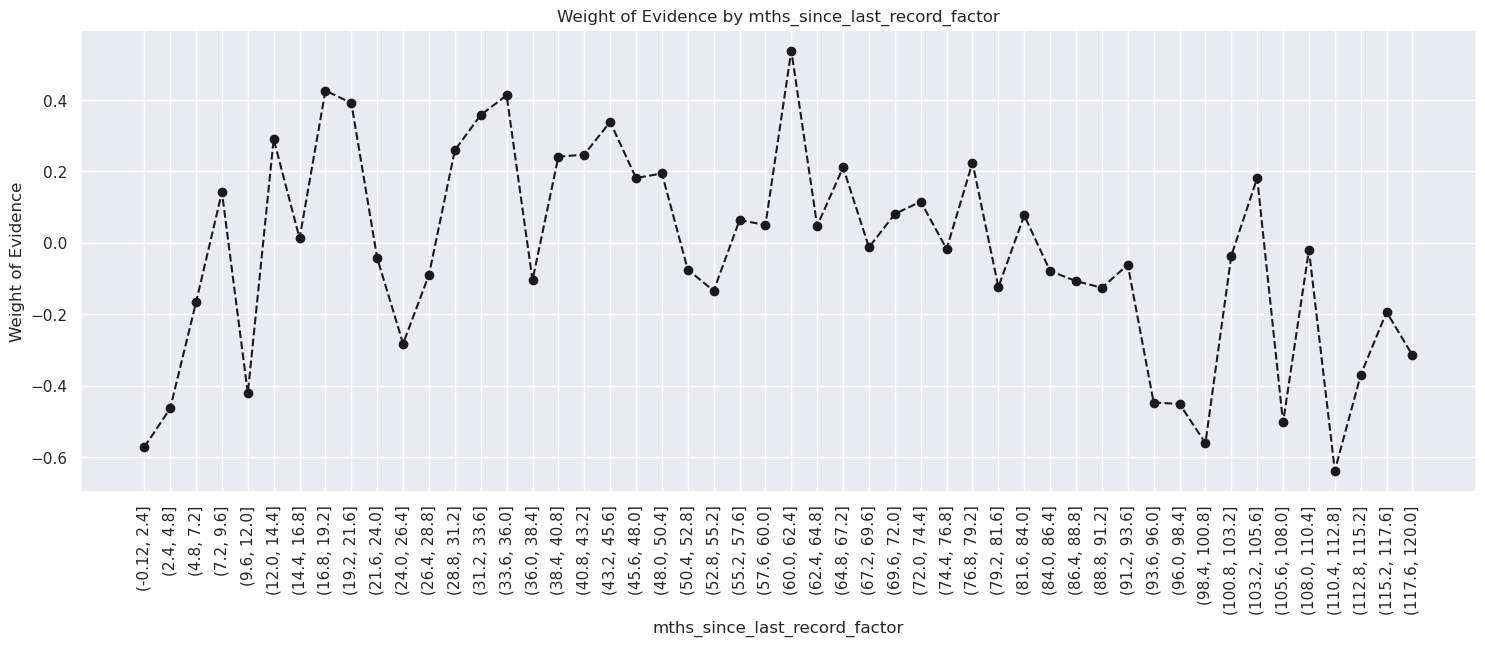

In [160]:
plot_by_woe(df_temp, 90)

In [161]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>=86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 86), 1, 0)

/tmp/ipykernel_11815/3220700279.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
/tmp/ipykernel_11815/3220700279.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
/tmp/ipykernel_11815/3220700279.py:3: PerformanceWarning: DataFrame is highly fra

## Preprocessing for test data set
After proprocessing all train data, store data in `loan_data_inputs_train`  
Re-run cell above again on `test` data

In [166]:
#####
# loan_data_inputs_train = df_inputs_prepr
#####
# loan_data_inputs_test = df_inputs_prepr
load_data_inputs_2015 = df_inputs_prepr

In [163]:
loan_data_targets_2015 = df_targets_prepr

In [167]:
load_data_inputs_2015.shape

(421094, 321)

In [168]:
loan_data_targets_2015.shape

(421094,)

In [169]:
load_data_inputs_2015.to_csv('../data/loan_data_inputs_2015.csv')
loan_data_targets_2015.to_csv('../data/loan_data_targets_2015.csv')

In [175]:
inputs_train_with_ref_cat = pd.read_csv("../data/inputs_train_with_ref_cat.csv", index_col = 0).loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [176]:
inputs_train_with_ref_cat.shape

(373028, 101)

In [177]:
inputs_2015_with_ref_cat = load_data_inputs_2015.loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [232]:
inputs_2015_with_ref_cat.shape

(421094, 102)

In [179]:
df_scorecard = pd.read_csv("../data/df_scorecard.csv", index_col=0)

In [233]:
df_scorecard.head()

index Feature name  Coefficients      p_values Original feature name  \
0      0    Intercept     -0.445985           NaN             Intercept   
1      1      grade:A      0.944051  4.229369e-25                 grade   
2      2      grade:B      0.732144  1.440979e-32                 grade   
3      3      grade:C      0.549044  7.371959e-22                 grade   
4      4      grade:D      0.373379  5.637468e-12                 grade   

   Score - Calculation  Score - Preliminary  Difference  Score - Final  
0           343.335213                343.0   -0.335213          343.0  
1            80.268148                 80.0   -0.268148           80.0  
2            62.250667                 62.0   -0.250667           62.0  
3            46.682562                 47.0    0.317438           47.0  
4            31.746632                 32.0    0.253368           32.0

In [234]:
inputs_train_with_ref_cat_w_intercept =  inputs_train_with_ref_cat
inputs_train_with_ref_cat_w_intercept.insert(0, "Intercept", 1)
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat_w_intercept[df_scorecard["Feature name"].values]

ValueError: cannot insert Intercept, already exists

In [235]:
inputs_train_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
427211          1     True    False    False    False    False    False   
206088          1    False    False     True    False    False    False   
136020          1     True    False    False    False    False    False   
412305          1    False    False    False     True    False    False   
36159           1    False    False     True    False    False    False   

        grade:G  home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  ...  \
427211    False                               False               False  ...   
206088    False                               False               False  ...   
136020    False                               False               False  ...   
412305    False                                True               False  ...   
36159     False                               False               False  ...   

        mths_since_last_delinq:4-30  mths_since_last_delinq:31-56  \
427211                            0                             0   
206088                            1                             0   
136020                            0                             1   
412305                            1                             0   
36159                             0                             0   

        mths_since_last_delinq:>=57  mths_since_last_record:Missing  \
427211                            0                               1   
206088                            0                               1   
136020                            0                               1   
412305                            0                               1   
36159                             0                               1   

        mths_since_last_record:0-2  mths_since_last_record:3-20  \
427211                           0                            0   
206088                           0                            0   
136020                           0                            0   
412305                           0                            0   
36159                            0                            0   

        mths_since_last_record:21-31  mths_since_last_record:32-80  \
427211                             0                             0   
206088                             0                             0   
136020                             0                             0   
412305                             0                             0   
36159                              0                             0   

        mths_since_last_record:81-86  mths_since_last_record:>=86  
427211                             0                            0  
206088                             0                            0  
136020                             0                            0  
412305                             0                            0  
36159                              0                            0  

[5 rows x 102 columns]

In [236]:
inputs_2015_with_ref_cat_w_intercept =  inputs_2015_with_ref_cat
inputs_2015_with_ref_cat_w_intercept.insert(0, "Intercept", 1)
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat_w_intercept[df_scorecard["Feature name"].values]

ValueError: cannot insert Intercept, already exists

In [237]:
inputs_2015_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
0          1    False    False     True    False    False    False    False   
1          1     True    False    False    False    False    False    False   
2          1    False    False     True    False    False    False    False   
3          1    False    False     True    False    False    False    False   
4          1    False     True    False    False    False    False    False   

   home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  ...  \
0                               False               False  ...   
1                               False               False  ...   
2                                True               False  ...   
3                                True               False  ...   
4                               False               False  ...   

   mths_since_last_delinq:4-30  mths_since_last_delinq:31-56  \
0                            0                             1   
1                            0                             0   
2                            1                             0   
3                            0                             0   
4                            0                             0   

   mths_since_last_delinq:>=57  mths_since_last_record:Missing  \
0                            0                               1   
1                            0                               1   
2                            0                               1   
3                            0                               1   
4                            0                               1   

   mths_since_last_record:0-2  mths_since_last_record:3-20  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   mths_since_last_record:21-31  mths_since_last_record:32-80  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   mths_since_last_record:81-86  mths_since_last_record:>=86  
0                             0                            0  
1                             0                            0  
2                             0                            0  
3                             0                            0  
4                             0                            0  

[5 rows x 102 columns]

In [238]:
scorecard_scores = df_scorecard["Score - Final"]
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [239]:
y_score_train = inputs_train_with_ref_cat_w_intercept.dot(scorecard_scores)

In [240]:
y_score_train.head()

0
427211  676.0
206088  639.0
136020  758.0
412305  597.0
36159   610.0

In [241]:
y_score_2015 = inputs_2015_with_ref_cat_w_intercept.dot(scorecard_scores)

In [242]:
y_score_2015.head()

0
0  759.0
1  792.0
2  622.0
3  716.0
4  704.0

In [243]:
inputs_train_with_ref_cat_w_intercept = pd.concat([inputs_train_with_ref_cat_w_intercept, y_score_train], axis=1)

In [244]:
inputs_2015_with_ref_cat_w_intercept = pd.concat([inputs_2015_with_ref_cat_w_intercept, y_score_2015], axis=1)

In [245]:
inputs_train_with_ref_cat_w_intercept.columns.values[inputs_train_with_ref_cat_w_intercept.shape[1] - 1] = "Score"

In [246]:
inputs_2015_with_ref_cat_w_intercept.columns.values[inputs_2015_with_ref_cat_w_intercept.shape[1] - 1] = "Score"

In [247]:
inputs_train_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
427211          1     True    False    False    False    False    False   
206088          1    False    False     True    False    False    False   
136020          1     True    False    False    False    False    False   
412305          1    False    False    False     True    False    False   
36159           1    False    False     True    False    False    False   

        grade:G  home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  ...  \
427211    False                               False               False  ...   
206088    False                               False               False  ...   
136020    False                               False               False  ...   
412305    False                                True               False  ...   
36159     False                               False               False  ...   

        mths_since_last_delinq:31-56  mths_since_last_delinq:>=57  \
427211                             0                            0   
206088                             0                            0   
136020                             1                            0   
412305                             0                            0   
36159                              0                            0   

        mths_since_last_record:Missing  mths_since_last_record:0-2  \
427211                               1                           0   
206088                               1                           0   
136020                               1                           0   
412305                               1                           0   
36159                                1                           0   

        mths_since_last_record:3-20  mths_since_last_record:21-31  \
427211                            0                             0   
206088                            0                             0   
136020                            0                             0   
412305                            0                             0   
36159                             0                             0   

        mths_since_last_record:32-80  mths_since_last_record:81-86  \
427211                             0                             0   
206088                             0                             0   
136020                             0                             0   
412305                             0                             0   
36159                              0                             0   

        mths_since_last_record:>=86  Score  
427211                            0  676.0  
206088                            0  639.0  
136020                            0  758.0  
412305                            0  597.0  
36159                             0  610.0  

[5 rows x 103 columns]

In [248]:
inputs_2015_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
0          1    False    False     True    False    False    False    False   
1          1     True    False    False    False    False    False    False   
2          1    False    False     True    False    False    False    False   
3          1    False    False     True    False    False    False    False   
4          1    False     True    False    False    False    False    False   

   home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  ...  \
0                               False               False  ...   
1                               False               False  ...   
2                                True               False  ...   
3                                True               False  ...   
4                               False               False  ...   

   mths_since_last_delinq:31-56  mths_since_last_delinq:>=57  \
0                             1                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   mths_since_last_record:Missing  mths_since_last_record:0-2  \
0                               1                           0   
1                               1                           0   
2                               1                           0   
3                               1                           0   
4                               1                           0   

   mths_since_last_record:3-20  mths_since_last_record:21-31  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   

   mths_since_last_record:32-80  mths_since_last_record:81-86  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   mths_since_last_record:>=86  Score  
0                            0  759.0  
1                            0  792.0  
2                            0  622.0  
3                            0  716.0  
4                            0  704.0  

[5 rows x 103 columns]

In [249]:
inputs_train_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 300) & (inputs_train_with_ref_cat_w_intercept['Score'] < 350), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 350) & (inputs_train_with_ref_cat_w_intercept['Score'] < 400), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 400) & (inputs_train_with_ref_cat_w_intercept['Score'] < 450), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:450-500'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 450) & (inputs_train_with_ref_cat_w_intercept['Score'] < 500), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 500) & (inputs_train_with_ref_cat_w_intercept['Score'] < 550), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 550) & (inputs_train_with_ref_cat_w_intercept['Score'] < 600), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 600) & (inputs_train_with_ref_cat_w_intercept['Score'] < 650), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 650) & (inputs_train_with_ref_cat_w_intercept['Score'] < 700), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 700) & (inputs_train_with_ref_cat_w_intercept['Score'] < 750), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 750) & (inputs_train_with_ref_cat_w_intercept['Score'] < 800), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 800) & (inputs_train_with_ref_cat_w_intercept['Score'] <= 850), 1, 0)
# We create dummy variables for score intervals in the dataframe with old ("expected").

In [250]:
inputs_2015_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 300) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 350), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 350) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 400), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 400) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 450), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:450-500'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 450) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 500), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 500) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 550), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 550) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 600), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 600) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 650), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 650) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 700), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 700) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 750), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 750) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 800), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 800) & (inputs_2015_with_ref_cat_w_intercept['Score'] <= 850), 1, 0)
# We create dummy variables for score intervals in the dataframe with new ("actual").

# Population Stability Index: Calculation and Interpretation

In [251]:
PSI_calc_train = inputs_train_with_ref_cat_w_intercept.sum() / inputs_train_with_ref_cat_w_intercept.shape[0]
# We create a dataframe with proportions of observations for each dummy variable for the old ("expected") data.

In [252]:
PSI_calc_2015 = inputs_2015_with_ref_cat_w_intercept.sum() / inputs_2015_with_ref_cat_w_intercept.shape[0]
# We create a dataframe with proportions of observations for each dummy variable for the new ("actual") data.

In [253]:
PSI_calc = pd.concat([PSI_calc_train, PSI_calc_2015], axis = 1)
# We concatenate the two dataframes along the columns.

In [254]:
PSI_calc = PSI_calc.reset_index()
# We reset the index of the dataframe. The index becomes from 0 to the total number of rows less one.
# The old index, which is the dummy variable name, becomes a column, named 'index'.
PSI_calc['Original feature name'] = PSI_calc['index'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
PSI_calc.columns = ['index', 'Proportions_Train', 'Proportions_New', 'Original feature name']
# We change the names of the columns of the dataframe.

In [270]:
PSI_calc = PSI_calc[np.array(['index', 'Original feature name', 'Proportions_Train', 'Proportions_New'])]
PSI_calc = PSI_calc.astype({"Proportions_Train":float, "Proportions_New":float})

In [272]:
PSI_calc.head()

index Original feature name  Proportions_Train  Proportions_New
1  grade:A                 grade           0.160200         0.174154
2  grade:B                 grade           0.294160         0.279287
3  grade:C                 grade           0.268733         0.286318
4  grade:D                 grade           0.164862         0.148789
5  grade:E                 grade           0.076702         0.082993

In [273]:
PSI_calc.dtypes

index                     object
Original feature name     object
Proportions_Train        float64
Proportions_New          float64
dtype: object

In [274]:
PSI_calc = PSI_calc[(PSI_calc['index'] != 'Intercept') & (PSI_calc['index'] != 'Score')]
# We remove the rows with values in the 'index' column 'Intercept' and 'Score'.

In [275]:
PSI_calc['Contribution'] = np.where((PSI_calc['Proportions_Train'] == 0) | (PSI_calc['Proportions_New'] == 0), 0, (PSI_calc['Proportions_New'] - PSI_calc['Proportions_Train']) * np.log(PSI_calc['Proportions_New'] / PSI_calc['Proportions_Train']))
# We calculate the contribution of each dummy variable to the PSI of each original variable it comes from.
# If either the proportion of old data or the proportion of new data are 0, the contribution is 0.
# Otherwise, we apply the PSI formula for each contribution.

/home/danny/miniconda3/envs/dask/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [276]:
PSI_calc

index  \
1                                         grade:A   
2                                         grade:B   
3                                         grade:C   
4                                         grade:D   
5                                         grade:E   
6                                         grade:F   
7                                         grade:G   
8              home_ownership:RENT_OTHER_NONE_ANY   
9                              home_ownership:OWN   
10                        home_ownership:MORTGAGE   
11                addr_state:ND_NE_IA_NV_FL_HI_AL   
12                               addr_state:NM_VA   
13                                  addr_state:NY   
14                   addr_state:OK_TN_MO_LA_MD_NC   
15                                  addr_state:CA   
16                         addr_state:UT_KY_AZ_NJ   
17                      addr_state:AR_MI_PA_OH_MN   
18                      addr_state:RI_MA_DE_SD_IN   
19                            addr_state:GA_WA_OR   
20                               addr_state:WI_MT   
21                                  addr_state:TX   
22                               addr_state:IL_CT   
23                   addr_state:KS_SC_CO_VT_AK_MS   
24                   addr_state:WV_NH_WY_DC_ME_ID   
25               verification_status:Not Verified   
26            verification_status:Source Verified   
27                   verification_status:Verified   
28   purpose:educ__sm_b__wedd__ren_en__mov__house   
29                            purpose:credit_card   
30                     purpose:debt_consolidation   
31                     purpose:oth__med__vacation   
32            purpose:major_purch__car__home_impr   
33                          initial_list_status:f   
34                          initial_list_status:w   
35                                        term:36   
36                                        term:60   
37                                   emp_length:0   
38                                   emp_length:1   
39                                 emp_length:2-4   
40                                 emp_length:5-6   
41                                 emp_length:7-9   
42                                  emp_length:10   
43                         mths_since_issue_d:<38   
44                       mths_since_issue_d:38-39   
45                       mths_since_issue_d:40-41   
46                       mths_since_issue_d:42-48   
47                       mths_since_issue_d:49-52   
48                       mths_since_issue_d:53-64   
49                       mths_since_issue_d:65-84   
50                         mths_since_issue_d:>84   
51                                int_rate:<9.548   
52                          int_rate:9.548-12.025   
53                          int_rate:12.025-15.74   
54                          int_rate:15.74-20.281   
55                               int_rate:>20.281   
56               mths_since_earliest_cr_line:<140   
57            mths_since_earliest_cr_line:141-164   
58            mths_since_earliest_cr_line:165-247   
59            mths_since_earliest_cr_line:248-270   
60            mths_since_earliest_cr_line:271-352   
61               mths_since_earliest_cr_line:>352   
62                               inq_last_6mths:0   
63                             inq_last_6mths:1-2   
64                             inq_last_6mths:3-6   
65                              inq_last_6mths:>6   
66                               acc_now_delinq:0   
67                             acc_now_delinq:>=1   
68                                annual_inc:<20K   
69                             annual_inc:20K-30K   
70                             annual_inc:30K-40K   
71                             annual_inc:40K-50K   
72                             annual_inc:50K-60K   
73                             annual_inc:60K-70K   
74                             annual_inc:70K-80K   
75                             annual_inc:80K-90K   
76              

In [277]:
PSI_calc.groupby('Original feature name')['Contribution'].sum()
# Finally, we sum all contributions for each original independent variable and the 'Score' variable.

Original feature name
Score                          0.637357
acc_now_delinq                 0.000925
addr_state                     0.003725
annual_inc                     0.005445
dti                            0.078143
emp_length                     0.007619
grade                          0.006775
home_ownership                 0.004275
initial_list_status            0.333717
inq_last_6mths                 0.046465
int_rate                       0.079230
mths_since_earliest_cr_line    0.033507
mths_since_issue_d             2.388305
mths_since_last_delinq         0.011594
mths_since_last_record         0.055505
purpose                        0.011645
term                           0.013099
verification_status            0.048219
Name: Contribution, dtype: float64